In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing pandas numpy seaoborn and matplot 

# 1. Data cleaning

## 1.1 Dropping columns with more than 60% NULL values

In [ ]:
# Dropping columns with more than 60% NULL values

loan_data = pd.read_csv('loan.csv') #Extract the loan data from the CSV

null_values_fraction = (loan_data.isnull().sum() / len(loan_data))


cols_to_be_eliminated = null_values_fraction[null_values_fraction > 0.6].index


print("The columns having more than 60% Null values and which will be eliminated are ",cols_to_be_eliminated)
print("The number of cols eliminated are: ", cols_to_be_eliminated.to_series().count())

loan_data.dropna(axis=1, thresh = len(loan_data)*0.4, inplace=True) # ELiminate the columns 

In [61]:
loan_data.describe() # A summary of the data. 
#We see many columns has only 0 as values, we also need to find which other columns has such unique values and eliminate them

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


## 1.2 Eliminate columns having unique values

In [62]:
loan_data[loan_data.apply(pd.Series.nunique)[loan_data.apply(pd.Series.nunique) == 1].index.to_series()]
#nunique function used on the loan_data dataframe and converted to series where there are unique values 

# The above columns must be eliminated
cols_to_be_eliminated = loan_data.apply(pd.Series.nunique)[loan_data.apply(pd.Series.nunique) == 1].index

print("The columns having unique values and which will be eliminated are ",cols_to_be_eliminated)
print("The number of cols eliminated are: ", cols_to_be_eliminated.to_series().count())


loan_data.drop(cols_to_be_eliminated, axis=1, inplace=True) # ELiminate the columns 

The columns having unique values and which will be eliminated are  Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')
The number of cols eliminated are:  9


In [63]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

## 1.3 Eliminate columns not used in the analysis

In [64]:
loan_data.drop(['revol_util','last_pymnt_d','last_credit_pull_d','title','url','desc','emp_title','earliest_cr_line','zip_code','collection_recovery_fee','recoveries','total_rec_late_fee','total_rec_int','total_rec_prncp','total_pymnt_inv','total_pymnt_inv','total_pymnt','out_prncp_inv','out_prncp','total_acc','revol_bal','inq_last_6mths','earliest_cr_line','delinq_2yrs','id','member_id','funded_amnt_inv'], axis=1, inplace=True)

#Dropping dates and text fields which does not help in analysis, need the issue_d col

In [65]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   term                  39717 non-null  object 
 3   int_rate              39717 non-null  object 
 4   installment           39717 non-null  float64
 5   grade                 39717 non-null  object 
 6   sub_grade             39717 non-null  object 
 7   emp_length            38642 non-null  object 
 8   home_ownership        39717 non-null  object 
 9   annual_inc            39717 non-null  float64
 10  verification_status   39717 non-null  object 
 11  issue_d               39717 non-null  object 
 12  loan_status           39717 non-null  object 
 13  purpose               39717 non-null  object 
 14  addr_state            39717 non-null  object 
 15  dti                

## 1.4 Eliminating the remaining NULL values

### 1.4.1 Checking the columns that have NULL values

In [66]:
loan_data.isna().sum()

# We see 2 columns which have certain null values

loan_amnt                  0
funded_amnt                0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
addr_state                 0
dti                        0
open_acc                   0
pub_rec                    0
last_pymnt_amnt            0
pub_rec_bankruptcies     697
dtype: int64

### 1.4.2 Checking the data for public bankruptcies column containing null values

In [67]:
#Checking the data for public bankruptcies column containing null values

loan_data[loan_data.pub_rec_bankruptcies.isna()]

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,open_acc,pub_rec,last_pymnt_amnt,pub_rec_bankruptcies
35006,15000,15000,36 months,8.94%,476.58,A,A5,< 1 year,MORTGAGE,110000.0,Not Verified,Sep-09,Fully Paid,credit_card,NY,7.07,6,0,1919.13,NaN
35058,3000,3000,36 months,14.26%,102.92,C,C5,3 years,MORTGAGE,80800.0,Not Verified,Sep-09,Fully Paid,credit_card,TX,14.97,13,0,111.23,NaN
35362,4000,4000,36 months,11.14%,131.22,B,B1,< 1 year,MORTGAGE,60000.0,Not Verified,Aug-09,Charged Off,car,MI,11.08,14,0,131.22,NaN
38443,2300,2300,36 months,13.17%,77.69,D,D2,10+ years,RENT,37152.0,Verified,Aug-08,Fully Paid,moving,NJ,2.26,4,0,77.78,NaN
38717,6000,6000,36 months,8.00%,188.02,A,A3,< 1 year,MORTGAGE,75000.0,Not Verified,May-08,Fully Paid,other,OH,16.08,16,0,189.36,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,36 months,8.07%,78.42,A,A4,4 years,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,home_improvement,CO,11.33,13,0,80.90,NaN
39713,8500,8500,36 months,10.28%,275.38,C,C1,3 years,RENT,18000.0,Not Verified,Jul-07,Fully Paid,credit_card,NC,6.40,6,0,281.94,NaN
39714,5000,5000,36 months,8.07%,156.84,A,A4,< 1 year,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,debt_consolidation,MA,2.30,11,0,0.00,NaN
39715,5000,5000,36 months,7.43%,155.38,A,A2,< 1 year,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,other,MD,3.72,17,0,0.00,NaN


In [68]:
# No Imputation possible, hence removing these rows

loan_data = loan_data[loan_data.pub_rec_bankruptcies.notna()]

### 1.4.3 Checking the data for Employee length column containing null values and imputing values most common

In [69]:
loan_data[loan_data.emp_length.isna()]

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,open_acc,pub_rec,last_pymnt_amnt,pub_rec_bankruptcies
168,2500,2500,36 months,7.51%,77.78,A,A3,NaN,OWN,12000.0,Source Verified,Dec-11,Charged Off,debt_consolidation,CA,16.30,13,0,77.78,0.0
323,18000,18000,60 months,17.58%,452.98,D,D4,NaN,MORTGAGE,60000.0,Verified,Dec-11,Fully Paid,debt_consolidation,AL,21.96,11,0,6909.59,0.0
394,4000,4000,36 months,11.71%,132.31,B,B3,NaN,RENT,24000.0,Source Verified,Dec-11,Fully Paid,home_improvement,FL,7.50,4,0,3658.15,0.0
422,1000,1000,36 months,14.65%,34.50,C,C3,NaN,RENT,18408.0,Not Verified,Dec-11,Charged Off,major_purchase,NJ,6.00,3,1,34.50,1.0
439,8250,8250,36 months,7.51%,256.67,A,A3,NaN,MORTGAGE,31500.0,Verified,Dec-11,Fully Paid,debt_consolidation,MD,17.87,17,0,278.92,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32591,10000,10000,36 months,14.22%,342.85,C,C5,NaN,RENT,45000.0,Not Verified,Jan-10,Fully Paid,small_business,PA,4.51,9,0,9431.97,0.0
32608,3700,3700,36 months,14.22%,126.86,C,C5,NaN,RENT,17496.8,Not Verified,Jan-10,Fully Paid,other,TX,3.36,2,0,132.70,0.0
32621,10000,10000,36 months,14.22%,342.85,C,C5,NaN,MORTGAGE,36000.0,Not Verified,Jan-10,Charged Off,other,MA,3.83,3,0,342.85,0.0
32631,6000,6000,36 months,12.73%,201.40,C,C1,NaN,MORTGAGE,60000.0,Not Verified,Jan-10,Fully Paid,moving,MN,12.80,7,1,222.95,0.0


In [70]:
# Lets check the maximum occouring annual income of those who have emp length as NULL

mode_of_annual_inc = float(loan_data[loan_data.emp_length.isna()]['annual_inc'].mode())
mode_of_annual_inc

36000.0

In [71]:
# We need to find out the mode of the emp length where the annual income is 36k
mode_of_emp_length = loan_data[loan_data.annual_inc == mode_of_annual_inc]['emp_length'].mode()[0]
mode_of_emp_length

'3 years'

In [72]:
#Imputing the value obtained 

loan_data.emp_length.fillna(loan_data[loan_data.emp_length == mode_of_emp_length]['emp_length'].mode()[0], inplace=True)

In [73]:
# There are no null values now

loan_data.isna().sum()

loan_amnt               0
funded_amnt             0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
open_acc                0
pub_rec                 0
last_pymnt_amnt         0
pub_rec_bankruptcies    0
dtype: int64

In [74]:
#Making values numeric for analysis

emp_length_mapping: dict = {
    '< 1 year': 0, '1 year': 1, '2 years': 2, '3 years': 3,
    '4 years': 4, '5 years': 5, '6 years': 6, '7 years': 7,
    '8 years': 8, '9 years': 9, '10+ years': 10
}

# Map function replaces values in the 'emp_length' column to numerical values
loan_data['emp_length'] = loan_data['emp_length'].map(emp_length_mapping)

In [75]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39020 entries, 0 to 39680
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39020 non-null  int64  
 1   funded_amnt           39020 non-null  int64  
 2   term                  39020 non-null  object 
 3   int_rate              39020 non-null  object 
 4   installment           39020 non-null  float64
 5   grade                 39020 non-null  object 
 6   sub_grade             39020 non-null  object 
 7   emp_length            39020 non-null  int64  
 8   home_ownership        39020 non-null  object 
 9   annual_inc            39020 non-null  float64
 10  verification_status   39020 non-null  object 
 11  issue_d               39020 non-null  object 
 12  loan_status           39020 non-null  object 
 13  purpose               39020 non-null  object 
 14  addr_state            39020 non-null  object 
 15  dti                

### 1.4.4 Cleaning up categorical variables like verification_status, home_ownership, loan_status

In [76]:
# Checking for categorical variables like verification_status, home_ownership, loan_status
print(loan_data.verification_status.unique())
print(loan_data.home_ownership.unique())
print(loan_data.loan_status.unique())


['Verified' 'Source Verified' 'Not Verified']
['RENT' 'OWN' 'MORTGAGE' 'OTHER']
['Fully Paid' 'Charged Off' 'Current']


In [77]:
# We see that the verification status has 2 values which mean the same' Verified' and 'Source Verified'

# Replace 'Source Verified' with Verified

loan_data['verification_status'].replace('Source Verified', 'Verified', inplace=True) 

In [78]:
# Additional data cleaning

loan_data.term = loan_data.term.apply(lambda x: int(x.replace(' months',''))) # Get the loan term as integer values

loan_data = loan_data.astype({
    'loan_amnt' : 'float',
    'funded_amnt' : 'float'
})

#Correct the datatype of the amount fields to float


loan_data.int_rate= loan_data.int_rate.apply(lambda x: float(x.replace('%',''))) # Remove the percent sign in the rate

In [79]:
# Adding columns for month , year and quarter for analysis 

loan_data['issue_d'] = pd.to_datetime(loan_data.issue_d, format='%b-%y') # COrrectly format the date

loan_data['issue_m'] = pd.DatetimeIndex(loan_data['issue_d']).month # Extract month

loan_data['issue_y'] = pd.DatetimeIndex(loan_data['issue_d']).year # Extract year

threshold_months = [4, 7, 9] # Thresold months for each quarter
quarter_labels = ['Q1', 'Q2', 'Q3', 'Q4']
loan_data['issue_q'] = loan_data['issue_m'].apply(lambda x: 'Q1' if x < threshold_months[0] \
                                                  else ( 'Q2' if x < threshold_months[1] \
                                                        else ('Q3' if x < threshold_months[2] \
                                                              else 'Q4')))


In [80]:
#We need to bucket the data for loan amt, int rate, loan status, annual inc, funded amt, dti

# Bucketting for loan_amt
loan_amt_thresholds = [5000, 10000, 15000]
loan_amt_labels = ['0 - 5K', '5K - 10K', '10K - 15K', '15K - above']
loan_data['loan_amnt_bucket'] = loan_data['loan_amnt'].apply(lambda x: '0 - 5K'  if x < loan_amt_thresholds[0] \
                                                           else ( '5K - 10K' if x < loan_amt_thresholds[1] \
                                                                 else ('10K - 15K' if x < loan_amt_thresholds[2] \
                                                                       else '15K - above')))

# Bucketting for int_rate
int_rate_bins = [5, 10, 15, 20, 25]
int_rate_labels = ['0%-5%', '6%-10%','11%-15%','16%-20%','21%-25%']
loan_data['int_rate_bucket'] = loan_data['int_rate'].apply(lambda x: '0%-5%'  if x < int_rate_bins[0] \
                                                             else ( '6%-10%' if x < int_rate_bins[1] \
                                                                 else ('11%-15%' if x < int_rate_bins[2] \
                                                                       else ('16%-20%' if x < int_rate_bins[3] \
                                                                                  else '21%-25%'))))

# Bucketting Annual Income
annual_inc_thresholds = [40000, 50000, 60000, 70000, 80000]
annual_inc_labels = ['0 - 40k', '40k - 50k', '50k - 60k', '60k - 70k', '70k - 80k', '80k - above']
loan_data['annual_inc_bucket'] = loan_data['annual_inc'].apply(lambda x: '0 - 40k'  if x < annual_inc_thresholds[0] \
                                                             else ( '40k - 50k' if x < annual_inc_thresholds[1] \
                                                                 else ('50k - 60k' if x < annual_inc_thresholds[2] \
                                                                       else ('60k - 70k' if x < annual_inc_thresholds[3] \
                                                                            else ('70k - 80k' if x < annual_inc_thresholds[4] \
                                                                                  else '80k - above')))))

# Bucketting Funded Amount
funded_amnt_thresholds = [5000, 10000, 15000]
funded_amnt_labels = ['0 - 5k', '5k - 10k', '10k - 15k', '15k - above']
loan_data['funded_amnt_bucket'] = loan_data['funded_amnt'].apply(lambda x: '0 - 5k'  if x < funded_amnt_thresholds[0] \
                                                             else ( '5k - 10k' if x < funded_amnt_thresholds[1] \
                                                                 else ('10k - 15k' if x < funded_amnt_thresholds[2] \
                                                                        else '15k - above')))

# Bucketting DTI
dti_thresholds = [8, 12, 16, 20]
dti_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
loan_data['dti_bucket'] = loan_data['dti'].apply(lambda x: 'Very Low'  if x < dti_thresholds[0] \
                                                             else ('Low' if x < dti_thresholds[1] \
                                                                 else ('Medium' if x < dti_thresholds[2] \
                                                                       else ('High' if x < dti_thresholds[3] \
                                                                            else 'Very High'))))

### 1.4.5 Outlier treatment

In [82]:
loan_data.describe() # We see that the cols annual inc and  installment has outliers

,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,annual_inc,dti,open_acc,pub_rec,last_pymnt_amnt,pub_rec_bankruptcies,issue_m,issue_y
count,39020.000000,39020.000000,39020.000000,39020.000000,39020.000000,39020.000000,3.902000e+04,39020.000000,39020.000000,39020.000000,39020.000000,39020.000000,39020.000000,39020.000000
mean,11242.004741,10967.680677,42.532650,12.045844,324.602306,4.939313,6.895865e+04,13.359369,9.292542,0.055510,2698.734848,0.043260,7.214300,2010.376679
std,7472.992773,7200.731107,10.682275,3.743006,208.860351,3.523163,6.315594e+04,6.670254,4.382455,0.238085,4464.028030,0.204324,3.367745,0.805927
min,500.000000,500.000000,36.000000,5.420000,16.080000,0.000000,4.000000e+03,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,2007.000000
25%,5500.000000,5400.000000,36.000000,9.250000,167.132500,2.000000,4.080000e+04,8.230000,6.000000,0.000000,219.880000,0.000000,4.000000,2010.000000
50%,10000.000000,9650.000000,36.000000,11.860000,280.020000,4.000000,5.900000e+04,13.450000,9.000000,0.000000,551.775000,0.000000,7.000000,2011.000000
75%,15000.000000,15000.000000,60.000000,14.610000,430.780000,9.000000,8.240400e+04,18.630000,12.000000,0.000000,3333.367500,0.000000,10.000000,2011.000000
max,35000.000000,35000.000000,60.000000,24.590000,1305.190000,10.000000,6.000000e+06,29.990000,44.000000,4.000000,36115.200000,2.000000,12.000000,2011.000000


<Axes: ylabel='annual_inc'>

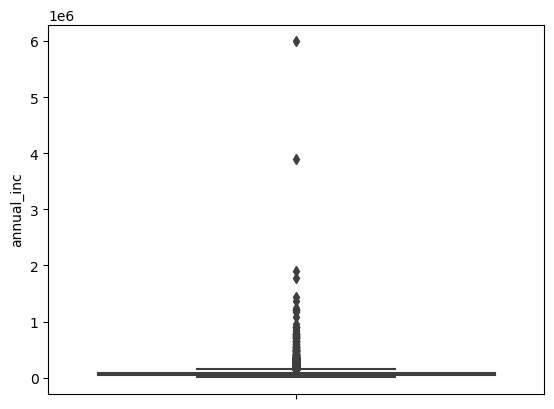

In [83]:
sns.boxplot(data=loan_data, y = 'annual_inc') # Checking using box plot for annual_inc

# Difficult to analyse, outlier treatment needed

<Axes: ylabel='installment'>

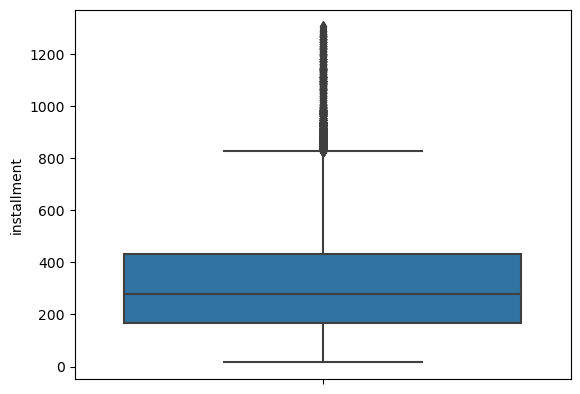

In [84]:
sns.boxplot(data=loan_data, y = 'installment') # installment variable can be analysed no need of outlier treatment

In [85]:
#There are too many outliers for annual_inc field, removing the outliers by calculating the lower and upper bound

iqr_mul = 1.5

quart1 = loan_data.annual_inc.quantile(0.25)
quart2 = loan_data.annual_inc.median()
quart3 = loan_data.annual_inc.quantile(0.75)
max = loan_data.annual_inc.max()
iqr = quart3 - quart1

lower_bound = quart1 - iqr_mul * iqr
upper_bound = quart3 + iqr_mul * iqr

lt = loan_data.annual_inc > lower_bound
ut = loan_data.annual_inc < upper_bound

req_inc = lt & ut

loan_data= loan_data[req_inc]

<Axes: ylabel='annual_inc'>

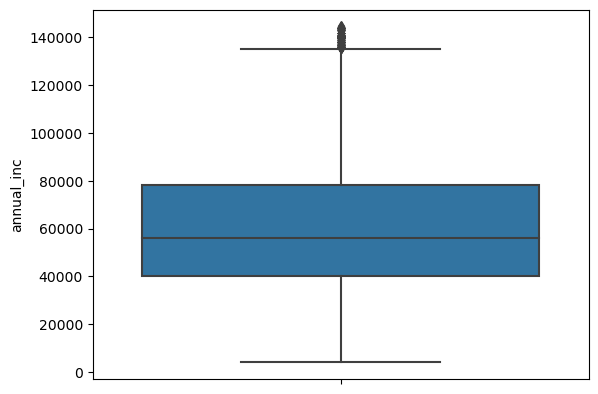

In [88]:
sns.boxplot(data=loan_data, y = 'annual_inc') # Box plot analysable

In [87]:
loan_data.info() #Check the number of columns and details

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37146 entries, 0 to 39680
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             37146 non-null  float64       
 1   funded_amnt           37146 non-null  float64       
 2   term                  37146 non-null  int64         
 3   int_rate              37146 non-null  float64       
 4   installment           37146 non-null  float64       
 5   grade                 37146 non-null  object        
 6   sub_grade             37146 non-null  object        
 7   emp_length            37146 non-null  int64         
 8   home_ownership        37146 non-null  object        
 9   annual_inc            37146 non-null  float64       
 10  verification_status   37146 non-null  object        
 11  issue_d               37146 non-null  datetime64[ns]
 12  loan_status           37146 non-null  object        
 13  purpose         

# 2. Univariate and Bivariate Analysis of each column

   ## 2.1 Ordered Categorical Variables

['grade', 'sub_grade', 'term', 'emp_length', 'issue_y', 'issue_m', 'issue_q']

### 2.1.1 a Univariate Analysis of Grade

Text(0.5, 0, 'Grade')

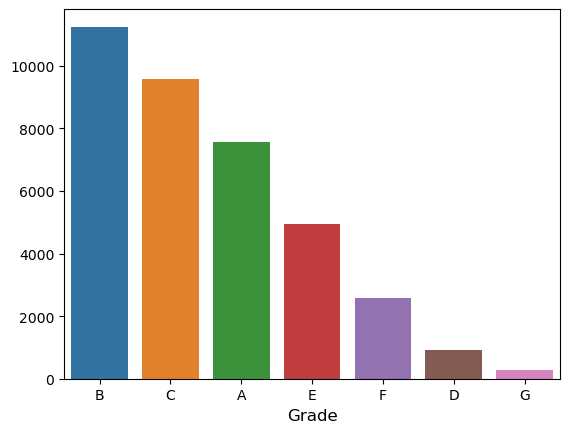

In [167]:
sns.barplot(data=loan_data[loan_data['loan_status'] == 'Charged_off'], x =pd.Series(loan_data['grade'].unique()), y= pd.Series(loan_data['grade'].value_counts().values))

plt.xlabel('Grade', fontsize=12)

# Category B gets chareged off the most

### Conclusion

Grade B gets charged off the most

### 2.1.1 b Bivariate Analysis of Grade

<Axes: xlabel='grade', ylabel='count'>

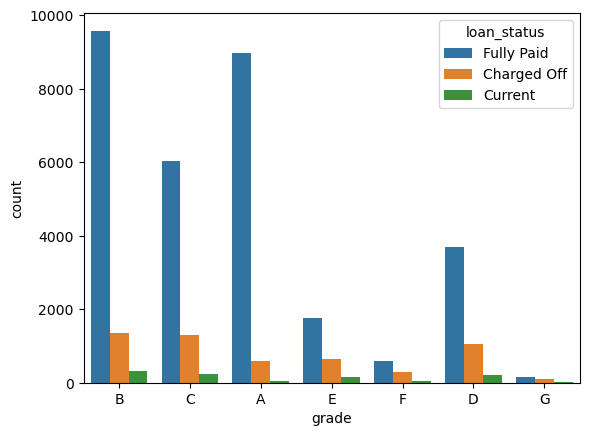

In [130]:
sns.countplot(x='grade', hue ='loan_status', data=loan_data)
# Loan status vs grade 

#Loan Grade B is defaulted the most followed by C

### Conclusion : 

Loan Grade B is defaulted the most followed by C

### 2.1.2 a Univariate Analysis of Sub Grade

Text(0.5, 0, 'Grade')

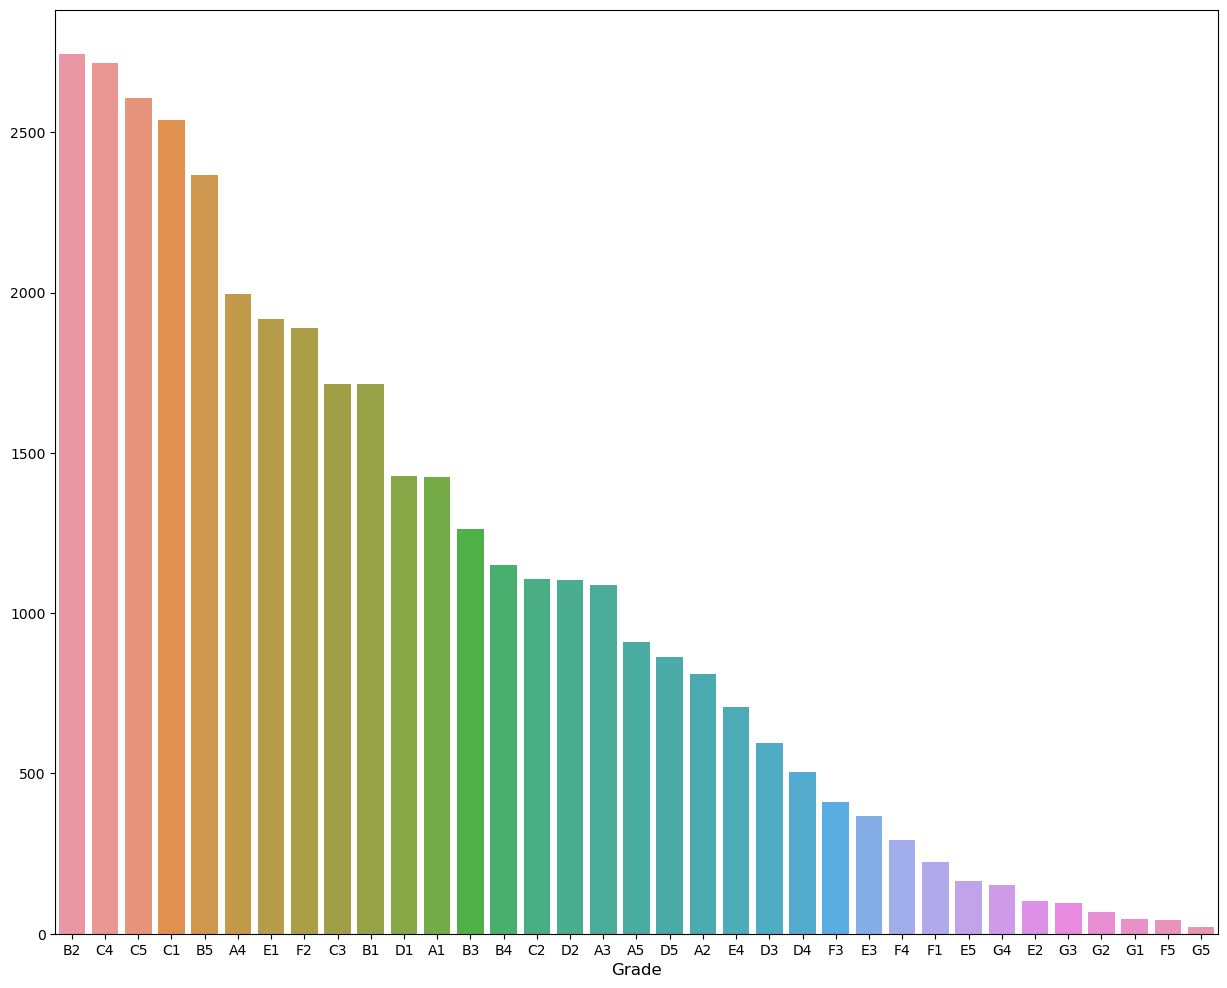

In [132]:
plt.figure(figsize=(15, 12))
sns.barplot(data=loan_data[loan_data['loan_status'] == 'Charged_off'], x =pd.Series(loan_data['sub_grade'].unique()), y= pd.Series(loan_data['sub_grade'].value_counts().values))
plt.xlabel('Grade', fontsize=12)


#B2 subcategory gets charged off the most

### Conlcusion : 

Sub grade B2 is charged off the most followed by C4, C5 and C1

## 2.1.2 b Bivariate Analysis of Grade

<Axes: xlabel='sub_grade', ylabel='count'>

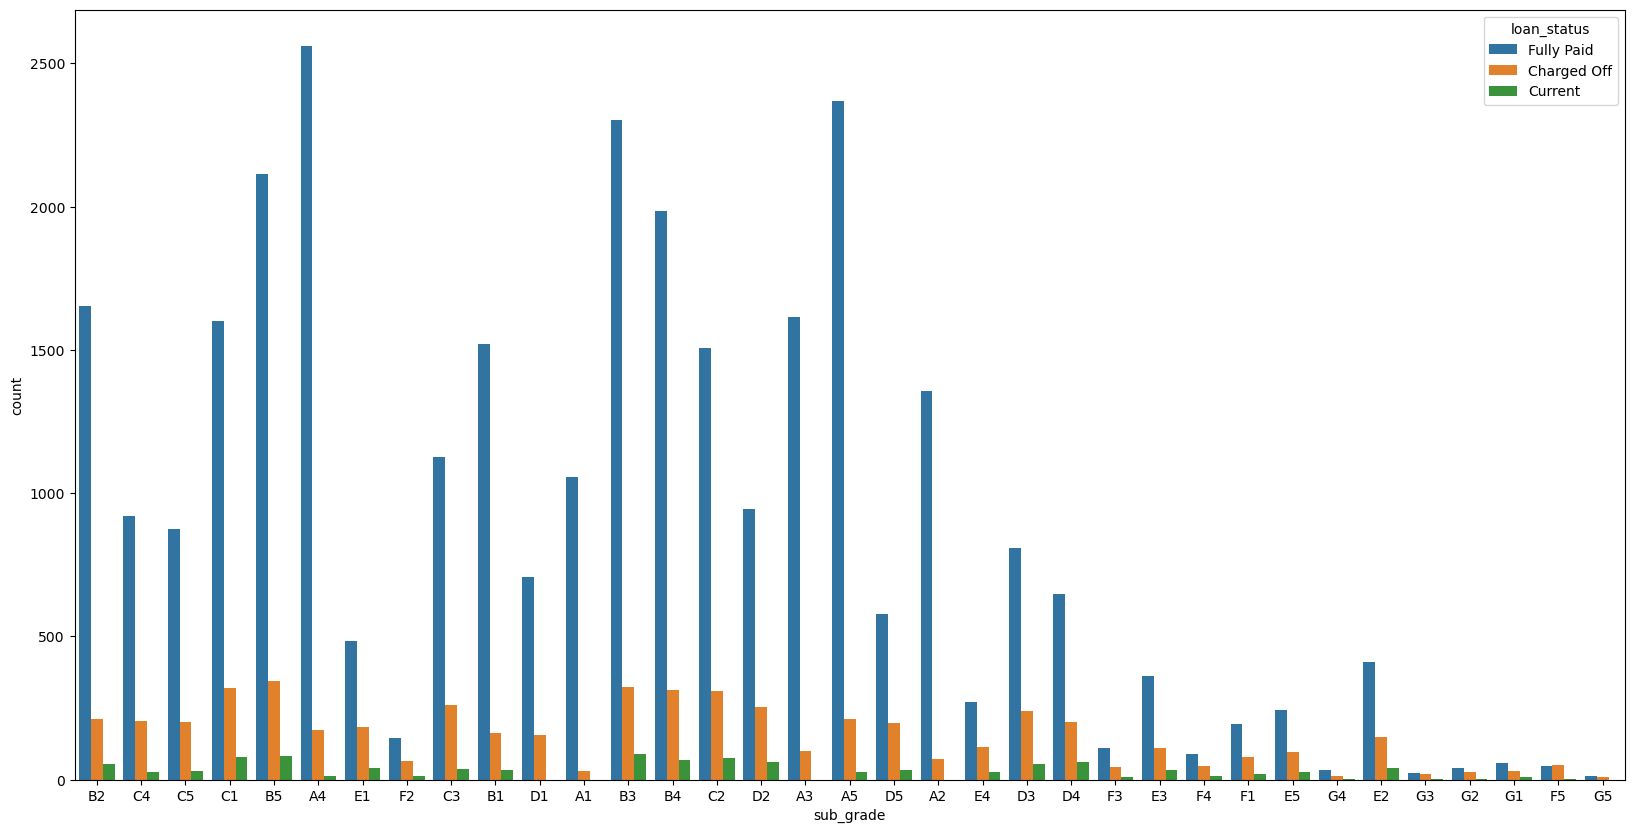

In [133]:
plt.figure(figsize=(20, 10))
sns.countplot(x='sub_grade', hue ='loan_status', data=loan_data)


# B3 B4 B5 are chareged off the most

### Conlcusion : 

Sub grade B5 is charged off the most followed by C1, B3 and B4

## 2.1.3 a Univariate Analysis of Term

Text(0.5, 0, 'Term')

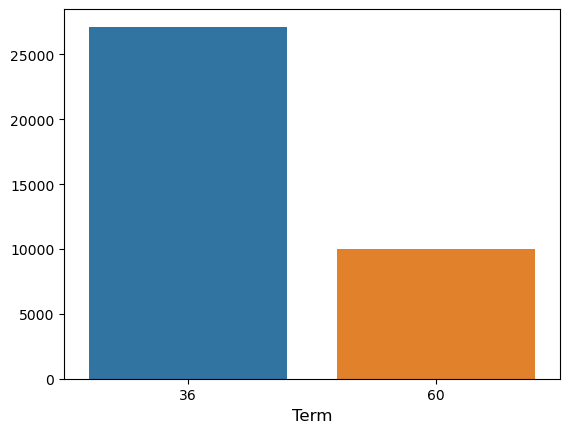

In [117]:
sns.barplot(data=loan_data[loan_data['loan_status'] == 'Charged_off'], x =pd.Series(loan_data['term'].unique()), y= pd.Series(loan_data['term'].value_counts().values))

plt.xlabel('Term', fontsize=12)
# 36 month loans get defaulted the most

### Conlcusion : 

36 month loans get defaulted the most

## 2.1.3 b Bivariate Analysis of Term

<Axes: xlabel='term', ylabel='count'>

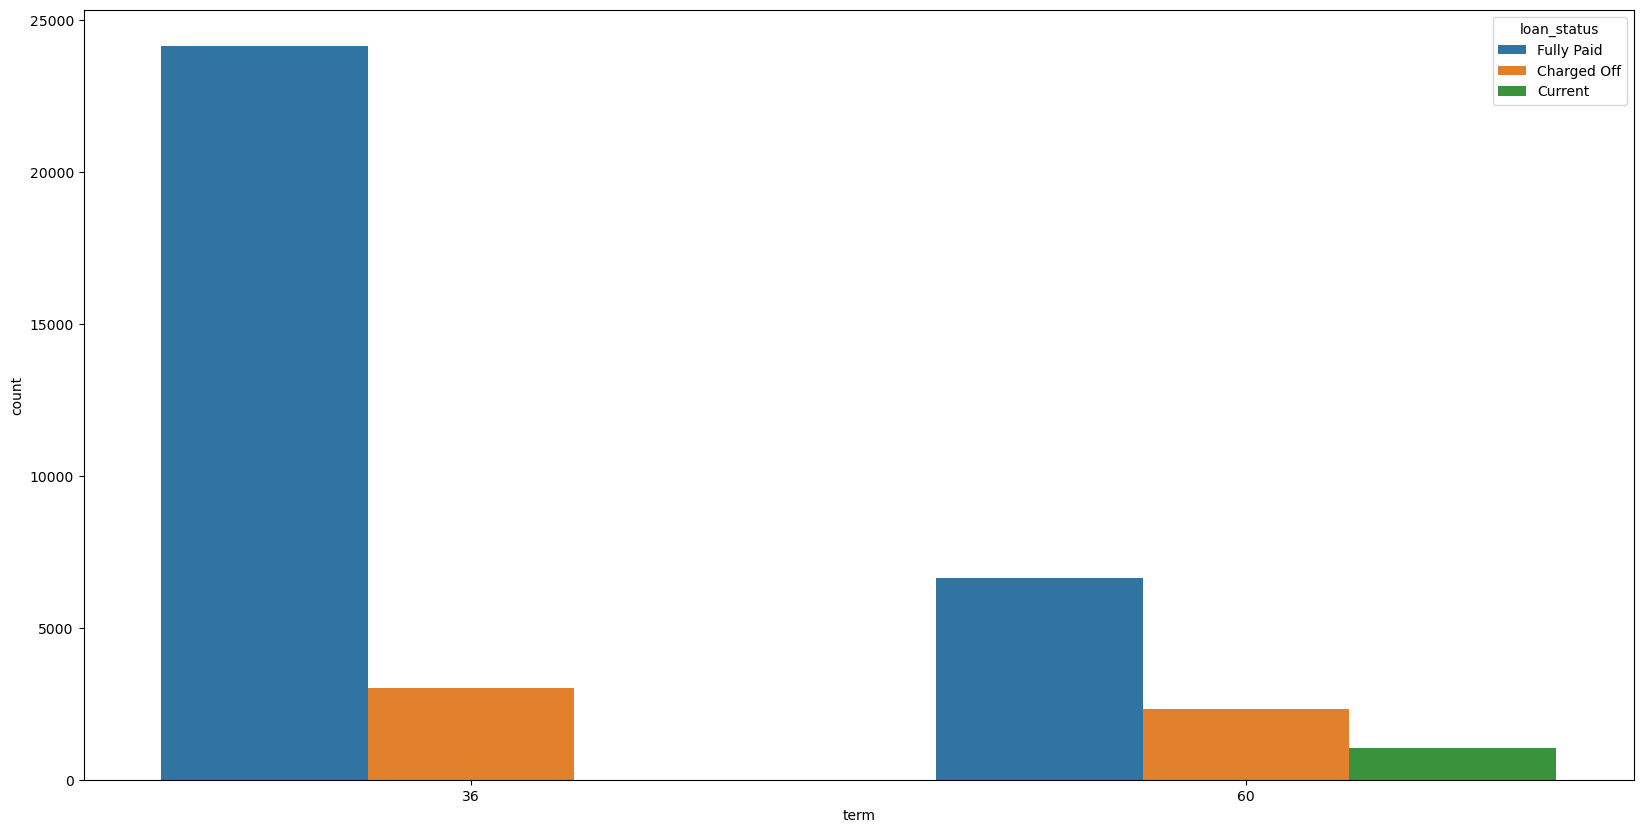

In [134]:
plt.figure(figsize=(20, 10))
sns.countplot(x='term', hue ='loan_status', data=loan_data)


# charegoff % of people taking 60 month loans is more, this is contrary to our earlier belief of 36 moths getting charged off more in comparison

### Conlcusion : 

The ratio of 60 month loans getting defaulted are higher

## 2.1.4 a Univariate Analysis of Employment length

Text(0.5, 0, 'Employment length')

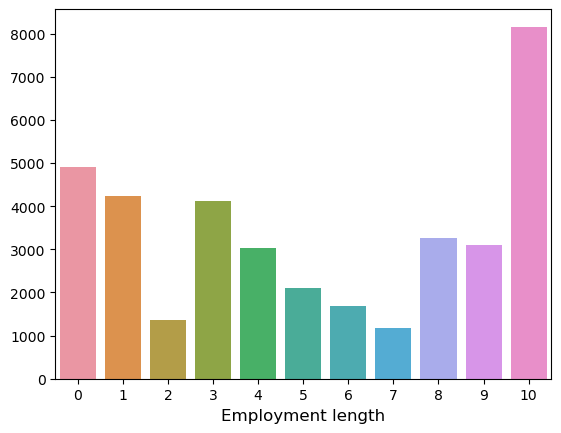

In [118]:
sns.barplot(data=loan_data[loan_data['loan_status'] == 'Charged_off'], x =pd.Series(loan_data['emp_length'].unique()), y= pd.Series(loan_data['emp_length'].value_counts().values))
plt.xlabel('Employment length', fontsize=12)
# No correlateion observed here though, older employees tend to default more compared to the newest employees. Employees with 7 years tend to default the least

### Conclusion : 

Employees with 10 years and more experience tend to default the most

## 2.1.4 b Bivariate Analysis of employment length

<Axes: xlabel='emp_length', ylabel='count'>

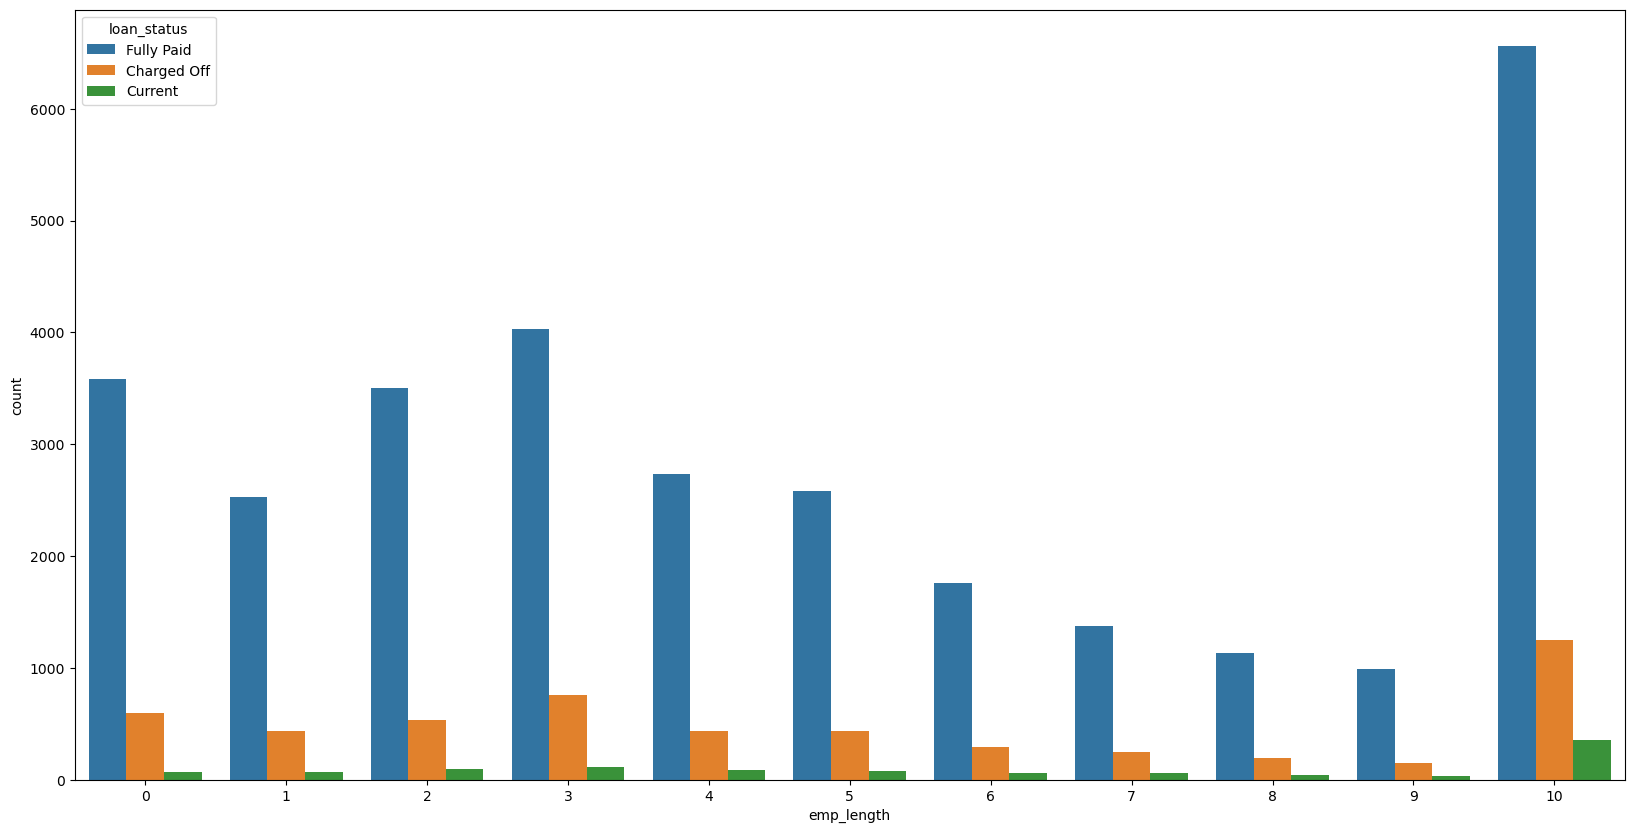

In [135]:
plt.figure(figsize=(20, 10))
sns.countplot(x='emp_length', hue ='loan_status', data=loan_data)

# people with 10 yrs or more exp are more likely to default

### Conclusion : 

Employees having experience of 10 years tend to take the most loans and default more than the others

## 2.1.5 a Univariate analysis of year

Text(0.5, 0, 'Year')

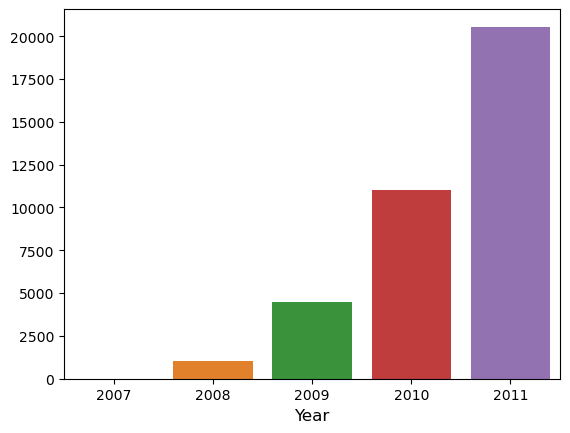

In [119]:
sns.barplot(data=loan_data[loan_data['loan_status'] == 'Charged_off'], x =pd.Series(loan_data['issue_y'].unique()), y= pd.Series(loan_data['issue_y'].value_counts().values))
plt.xlabel('Year', fontsize=12)

#Defaults are rising over the years

### Conclusion:

2011 may have economic factors due to which the charged off loans are more

## 2.1.5 b Bivariate analysis of year

<Axes: xlabel='issue_y', ylabel='count'>

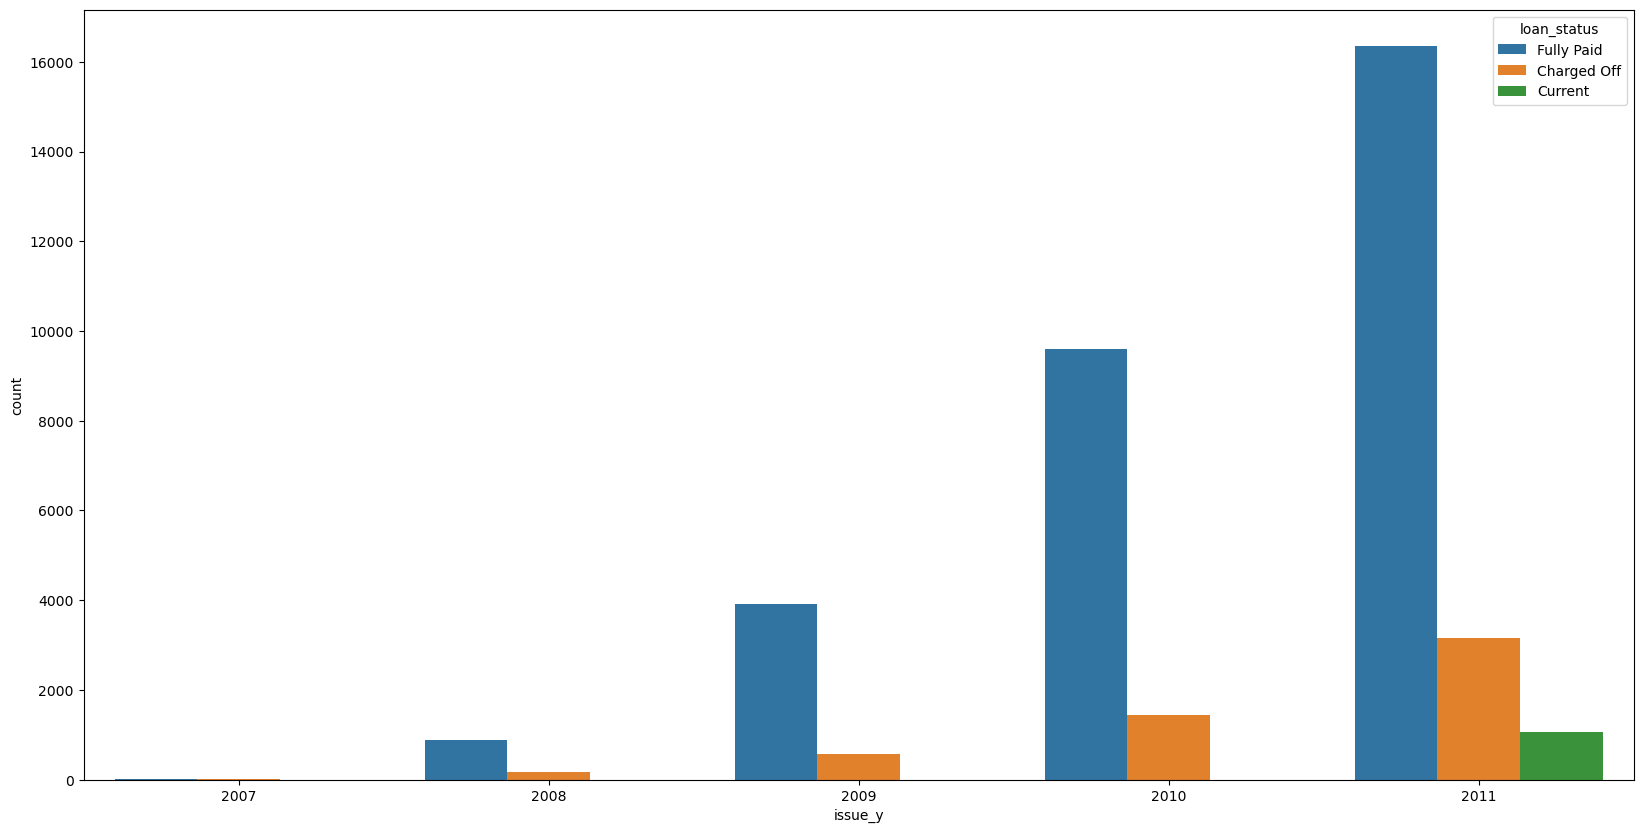

In [136]:
plt.figure(figsize=(20, 10))
sns.countplot(x='issue_y', hue ='loan_status', data=loan_data)

# There is an increasing trend n the number of loans over the years

### Conclusion:

The number of loan applicants increased in 2011 indicating increased economic activity 

## 2.1.6 a Univariate analysis of Quarter

Text(0.5, 0, 'Year')

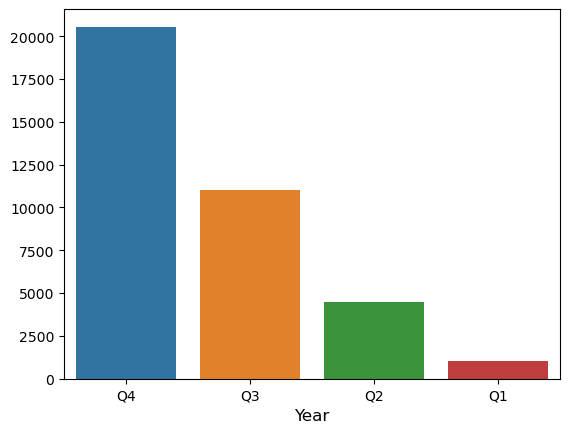

In [139]:
sns.barplot(data=loan_data[loan_data['loan_status'] == 'Charged_off'], x =pd.Series(loan_data['issue_q'].unique()), y= pd.Series(loan_data['issue_y'].value_counts().values))
plt.xlabel('Quarter', fontsize=12)

#Defaults are rising over the years

### COnlusion : 

Q4 takes the highest number of loans mostly due to december holiday season

## 2.1.6 b Bivariate analysis of Quarter

<Axes: xlabel='issue_q', ylabel='count'>

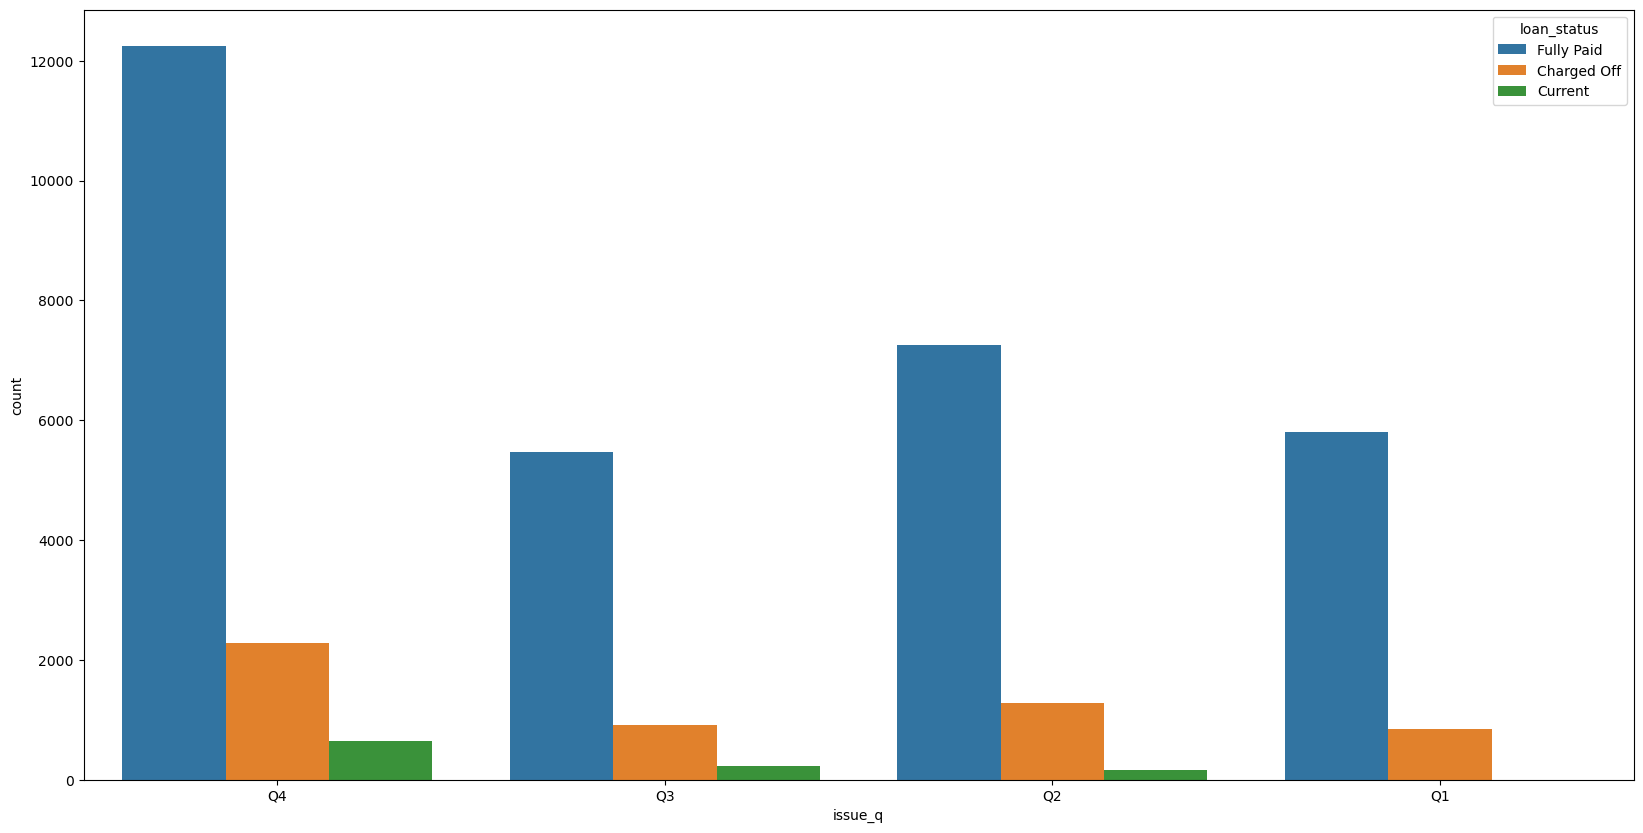

In [138]:
plt.figure(figsize=(20, 10))
sns.countplot(x='issue_q', hue ='loan_status', data=loan_data)

# Q4 takes the highest number of loans mostly due to december holiday season

### Conclusion : 

Q4 takes the highest number of loans mostly due to december holiday season



## 2.2 Unordered categorical variables

## 2.2.1 a Univariate analysis of State

Text(0.5, 0, 'State')

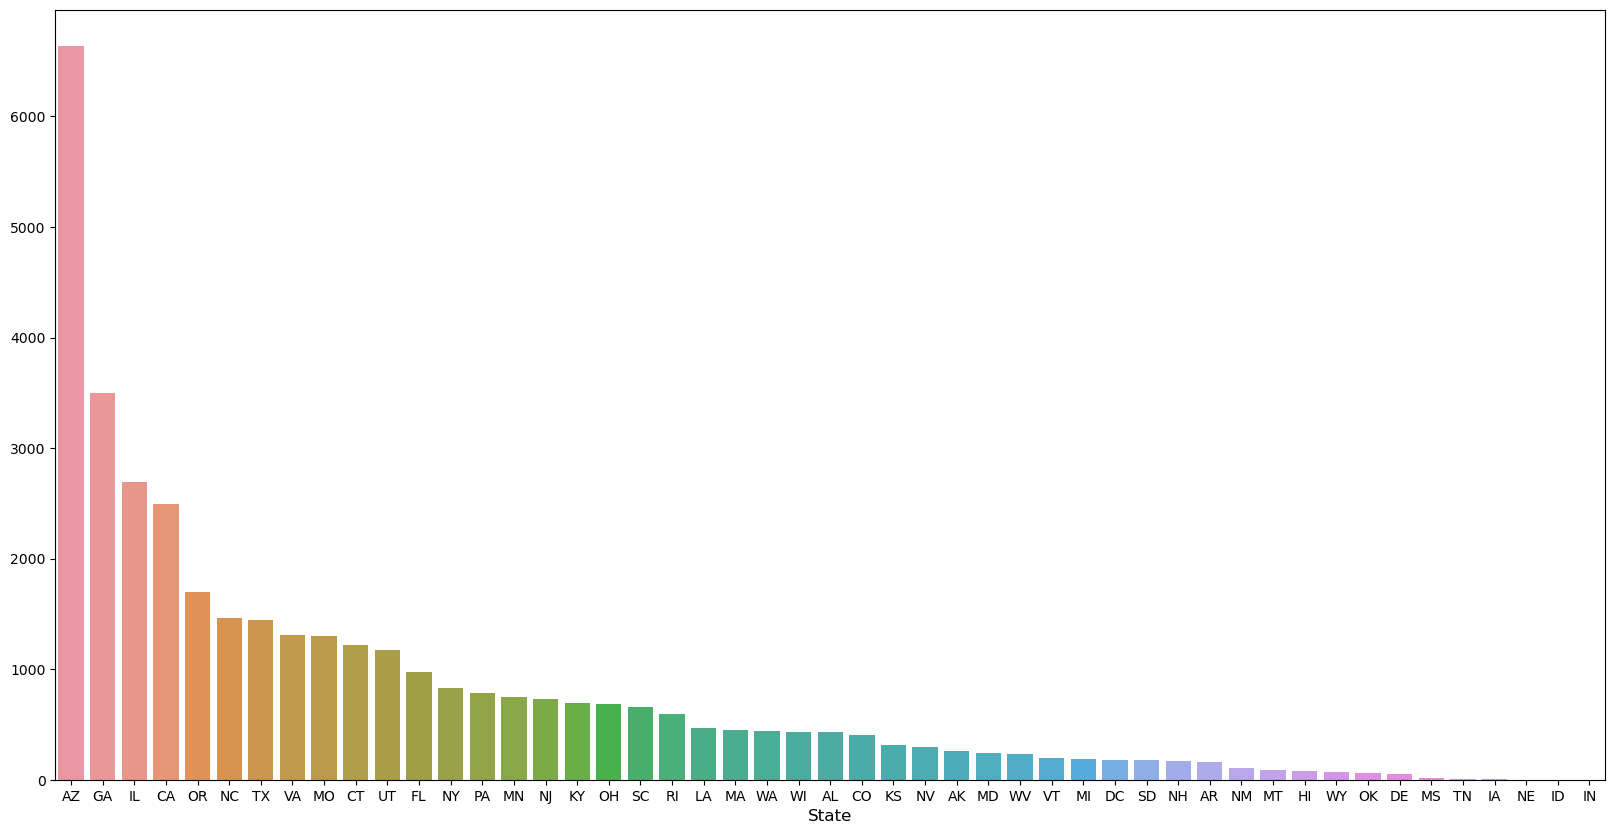

In [123]:
plt.figure(figsize=(20, 10))
sns.barplot(data=loan_data[loan_data['loan_status'] == 'Charged_off'], x =pd.Series(loan_data['addr_state'].unique()), y= pd.Series(loan_data['addr_state'].value_counts().values))
plt.xlabel('State', fontsize=12)
# Arizona has the most number of defaulters with 6700 defaulters

### Conclusion : 

Arizona contributes the most defaulters

## 2.2.1 b Bivariate analysis of State

<Axes: xlabel='addr_state', ylabel='count'>

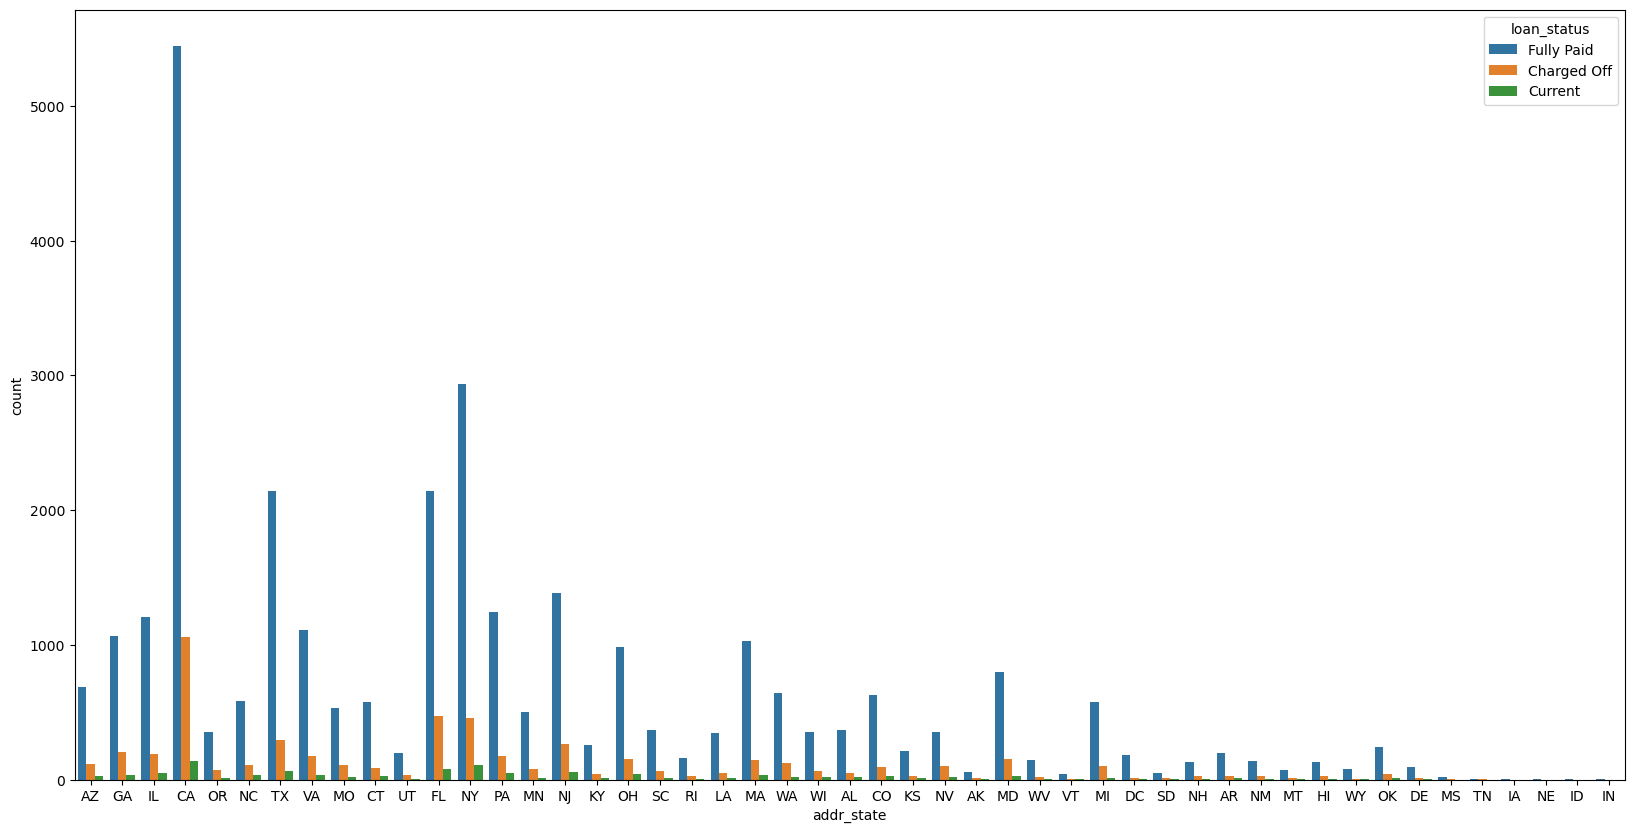

In [141]:
plt.figure(figsize=(20, 10))
sns.countplot(x='addr_state', hue ='loan_status', data=loan_data)

# California shows the highest percent of defaulters

### Conclusion : 

California shows the highest percent of defaulters floowed by Florida and New York

## 2.2.2 a Univariate analysis of Purpose

Text(0.5, 0, 'Purpose')

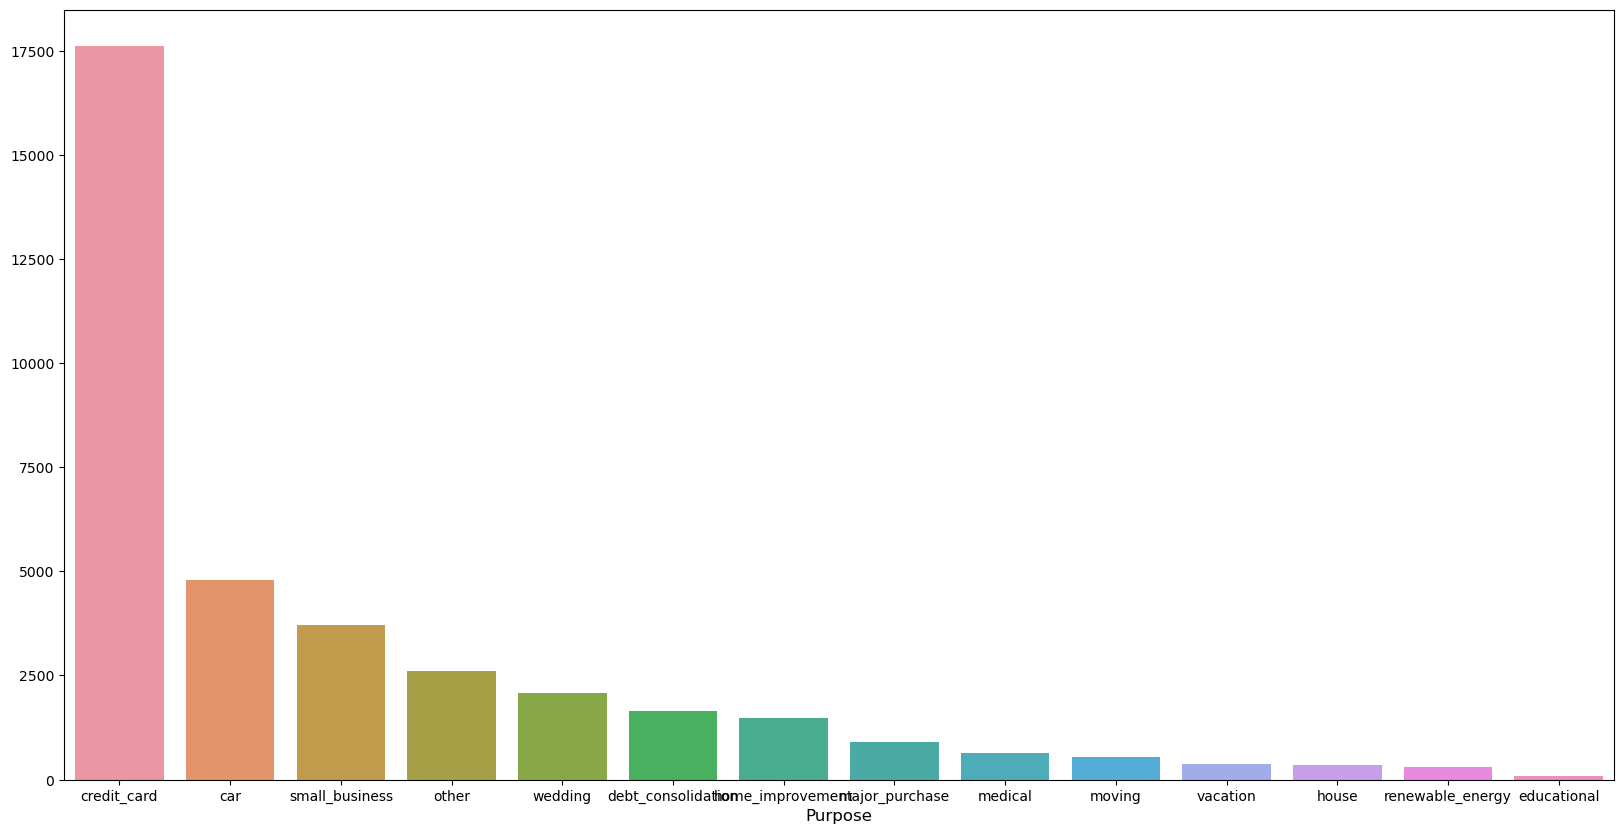

In [125]:
plt.figure(figsize=(20, 10))
sns.barplot(data=loan_data[loan_data['loan_status'] == 'Charged_off'], x =pd.Series(loan_data['purpose'].unique()), y= pd.Series(loan_data['purpose'].value_counts().values))
plt.xlabel('Purpose', fontsize=12)

# credit card loans has the highest number of defaulters with 17500 defaulters

### COnclusion:

Credit card loans are the most defaulted

## 2.2.2 b Bivariate analysis of Purpose

<Axes: xlabel='purpose', ylabel='count'>

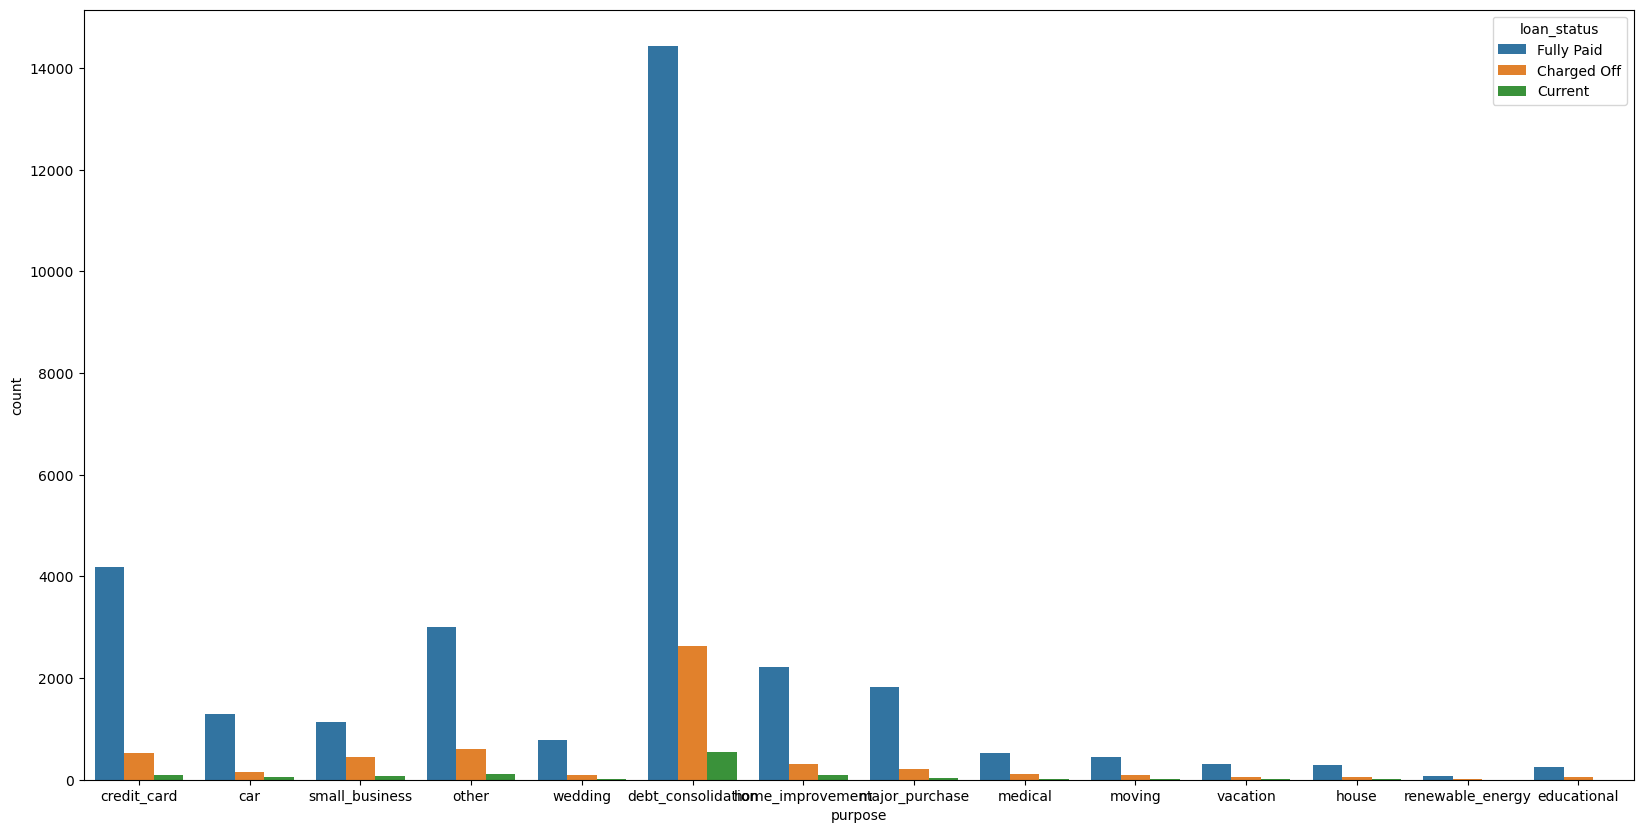

In [143]:
plt.figure(figsize=(20, 10))
sns.countplot(x='purpose', hue ='loan_status', data=loan_data)


### Conlusion:

Debt consolidation loans are the most defaulted

## 2.2.3 a Univariate analysis of Home Ownership

Text(0.5, 0, 'Home ownership')

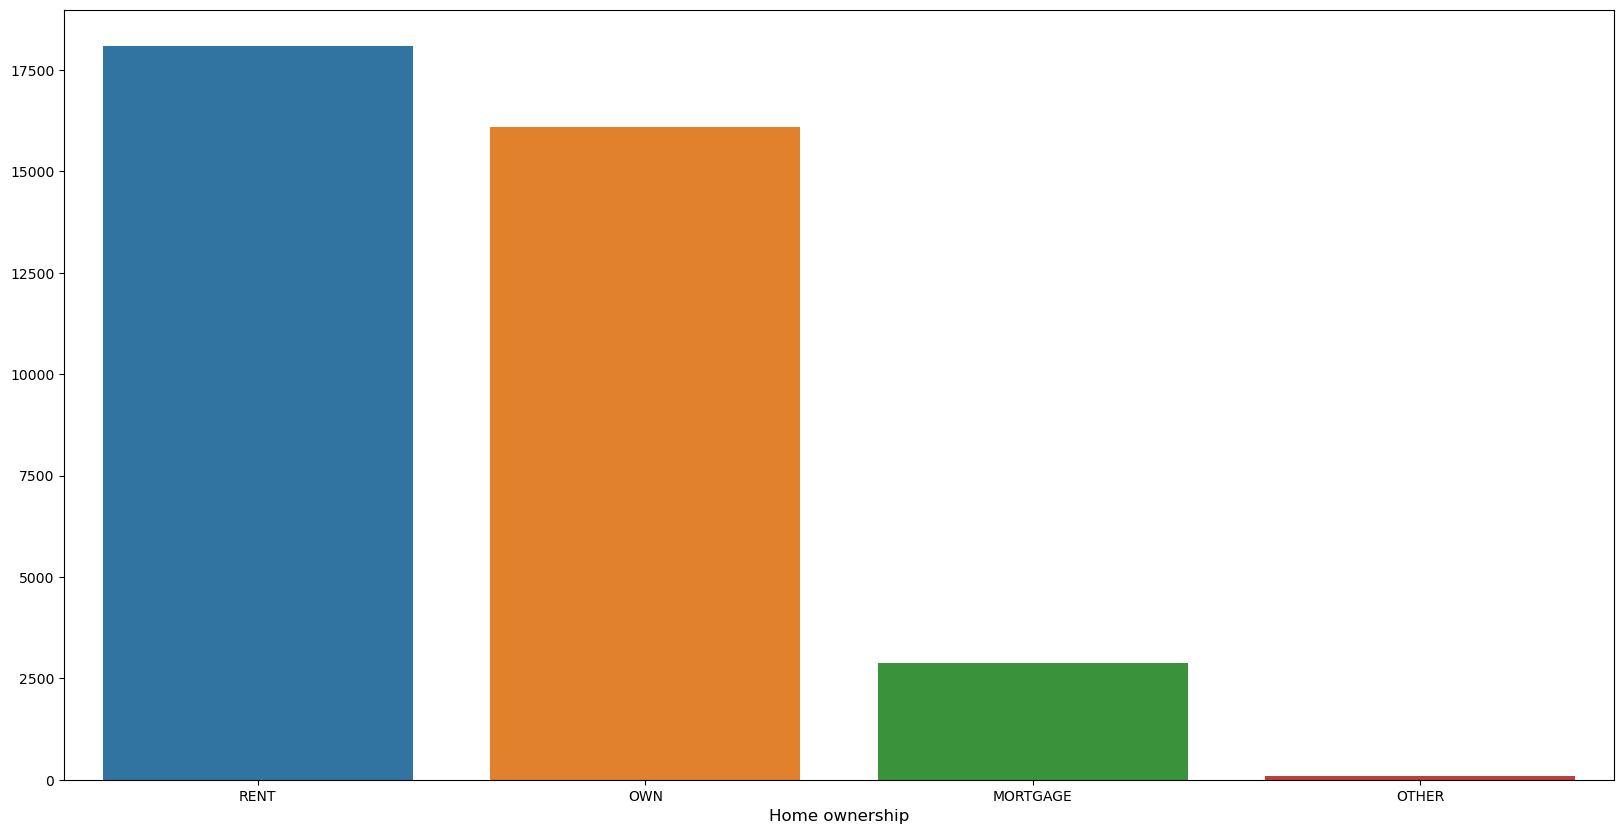

In [126]:
plt.figure(figsize=(20, 10))
sns.barplot(data=loan_data[loan_data['loan_status'] == 'Charged_off'], x =pd.Series(loan_data['home_ownership'].unique()), y= pd.Series(loan_data['home_ownership'].value_counts().values))
plt.xlabel('Home ownership', fontsize=12)
#Rented owners default most followed by people who own homes as compared to a negligible amount of people who have mortgaged homes

### COnlusion : 

Rental owners default the most

## 2.2.3 b Bivariate analysis of Home ownership

<Axes: xlabel='home_ownership', ylabel='count'>

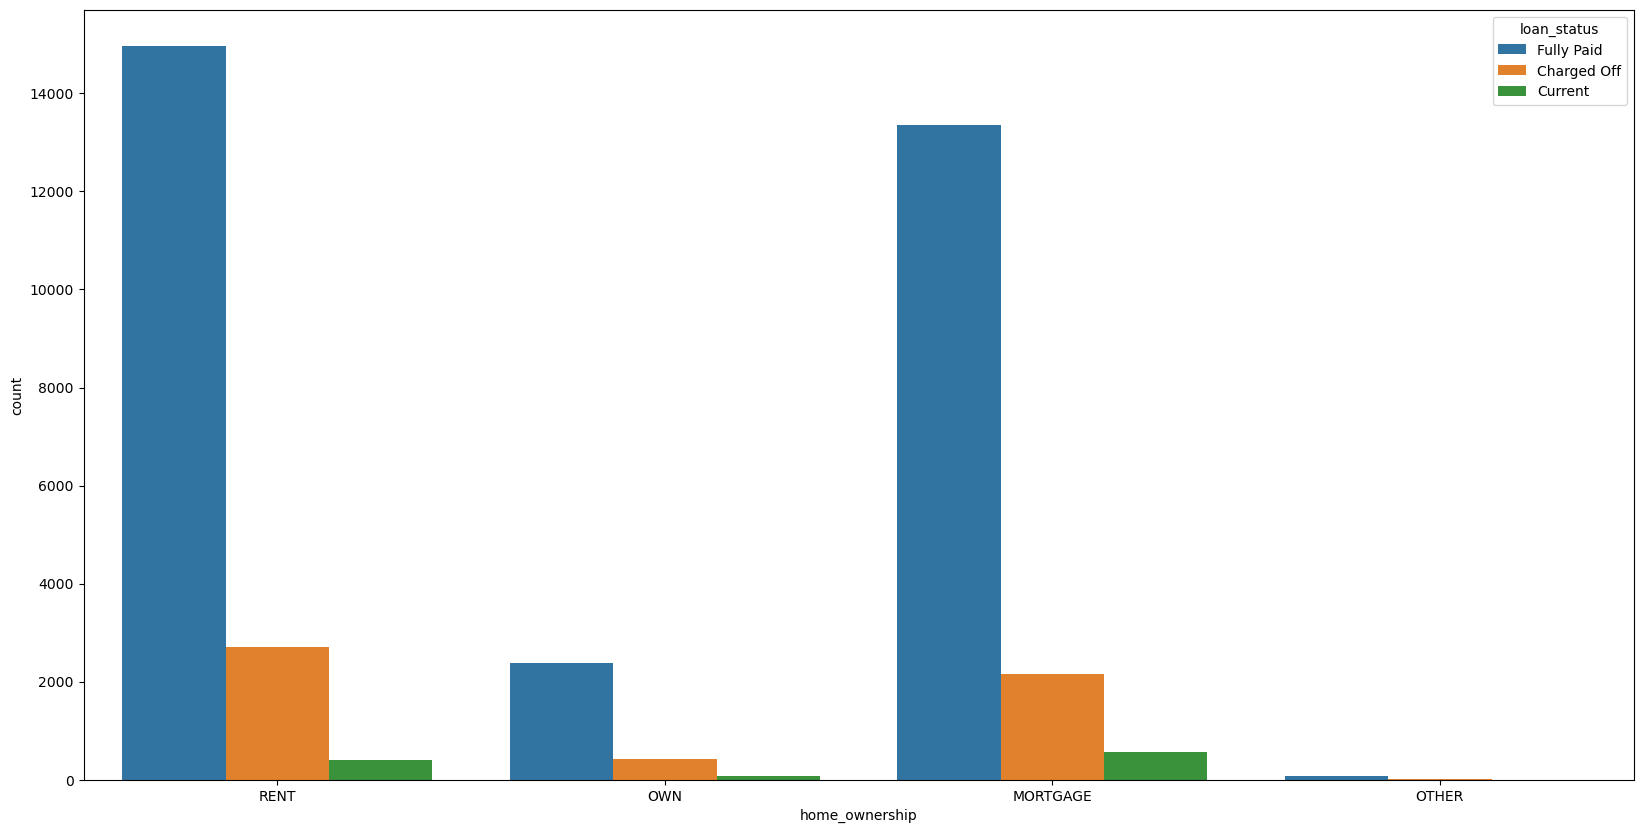

In [144]:
plt.figure(figsize=(20, 10))
sns.countplot(x='home_ownership', hue ='loan_status', data=loan_data)

# California shows the highest percent of defaulters

### COnlsuion : 

Rental and mortgage owners tend to default more on loans due to other payments like other mortgages and rent. 
So the bank should check cashflow and asses their capacity to repay the loan

## 2.3 Quantitative variables

['annual_inc_bucket', 'int_rate_bucket', 'loan_amnt_bucket', 'funded_amnt_bucket', 'dti_bucket']

## 2.3.1 a Univariate analysis of Loan Amount

count    37146.000000
mean     10876.098369
std       7179.166668
min        500.000000
25%       5125.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

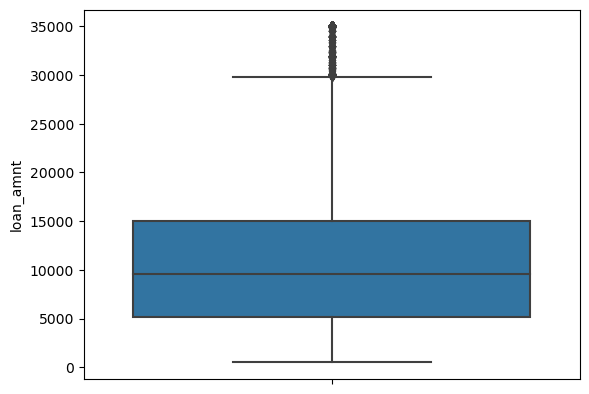

In [89]:
# Box Plot analysis

sns.boxplot(data=loan_data, y = 'loan_amnt')
plt.title='Loan Amount'
loan_data.loan_amnt.describe()

Text(0.5, 0, 'Loan Amount')

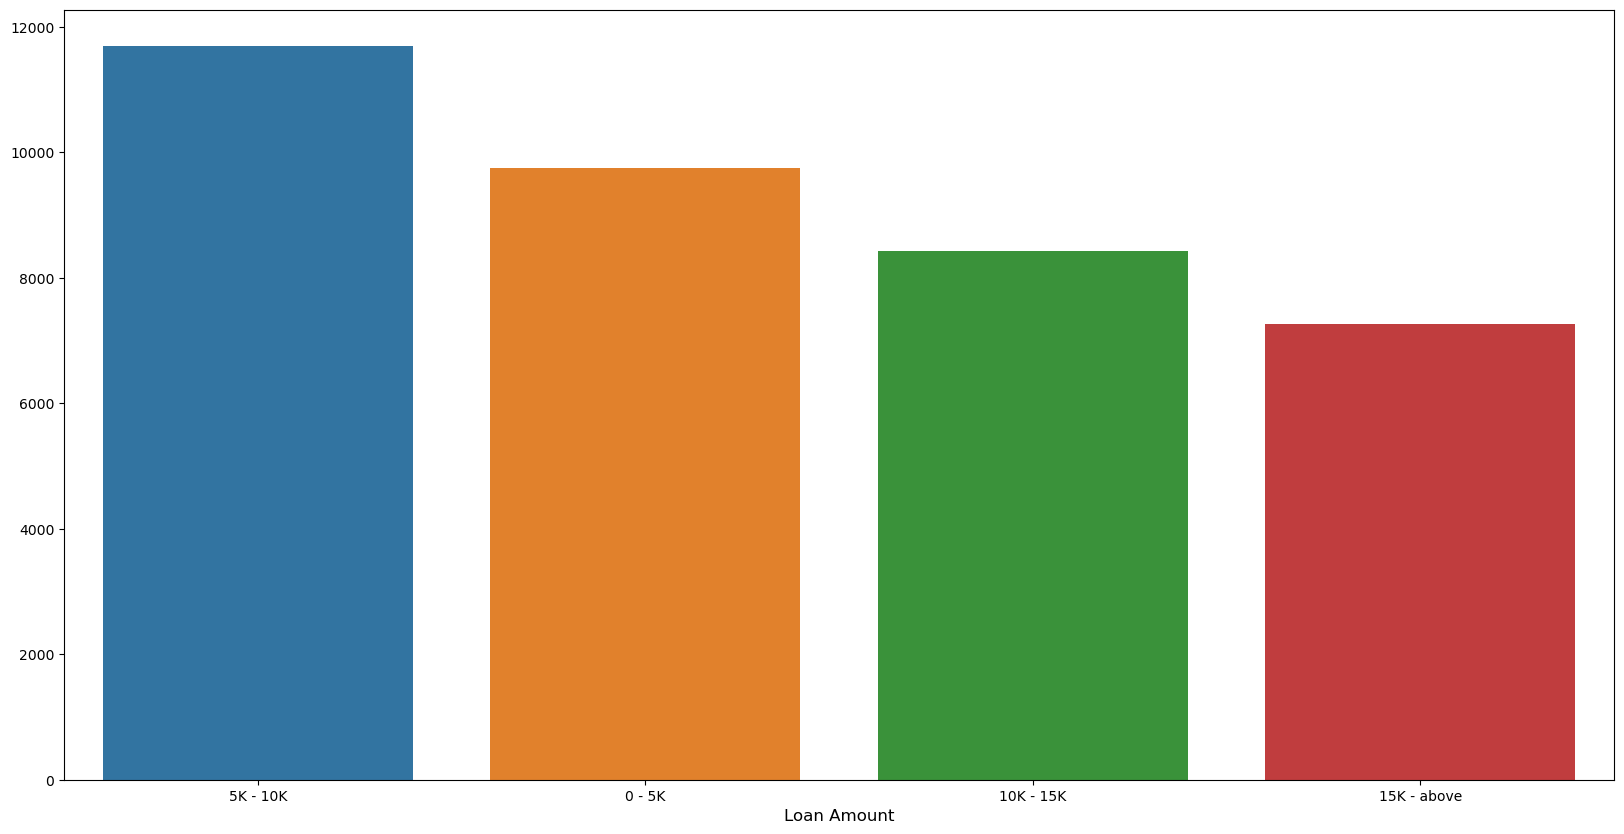

In [152]:
plt.figure(figsize=(20, 10))
sns.barplot(data=loan_data[loan_data['loan_status'] == 'Charged_off'], x =pd.Series(loan_data['loan_amnt_bucket'].unique()), y= pd.Series(loan_data['loan_amnt_bucket'].value_counts().values))
plt.xlabel('Loan Amount', fontsize=12)

# People taking loan amounts of 5 - 10k are more likely to default. Lower amounts are more likely than higher amounts

### Conlusion : 
Mid size loans of 5 - 10k are the most defaulted

## 2.3.1 b Bivariate analysis of Loan Amount

<Axes: xlabel='loan_amnt_bucket', ylabel='count'>

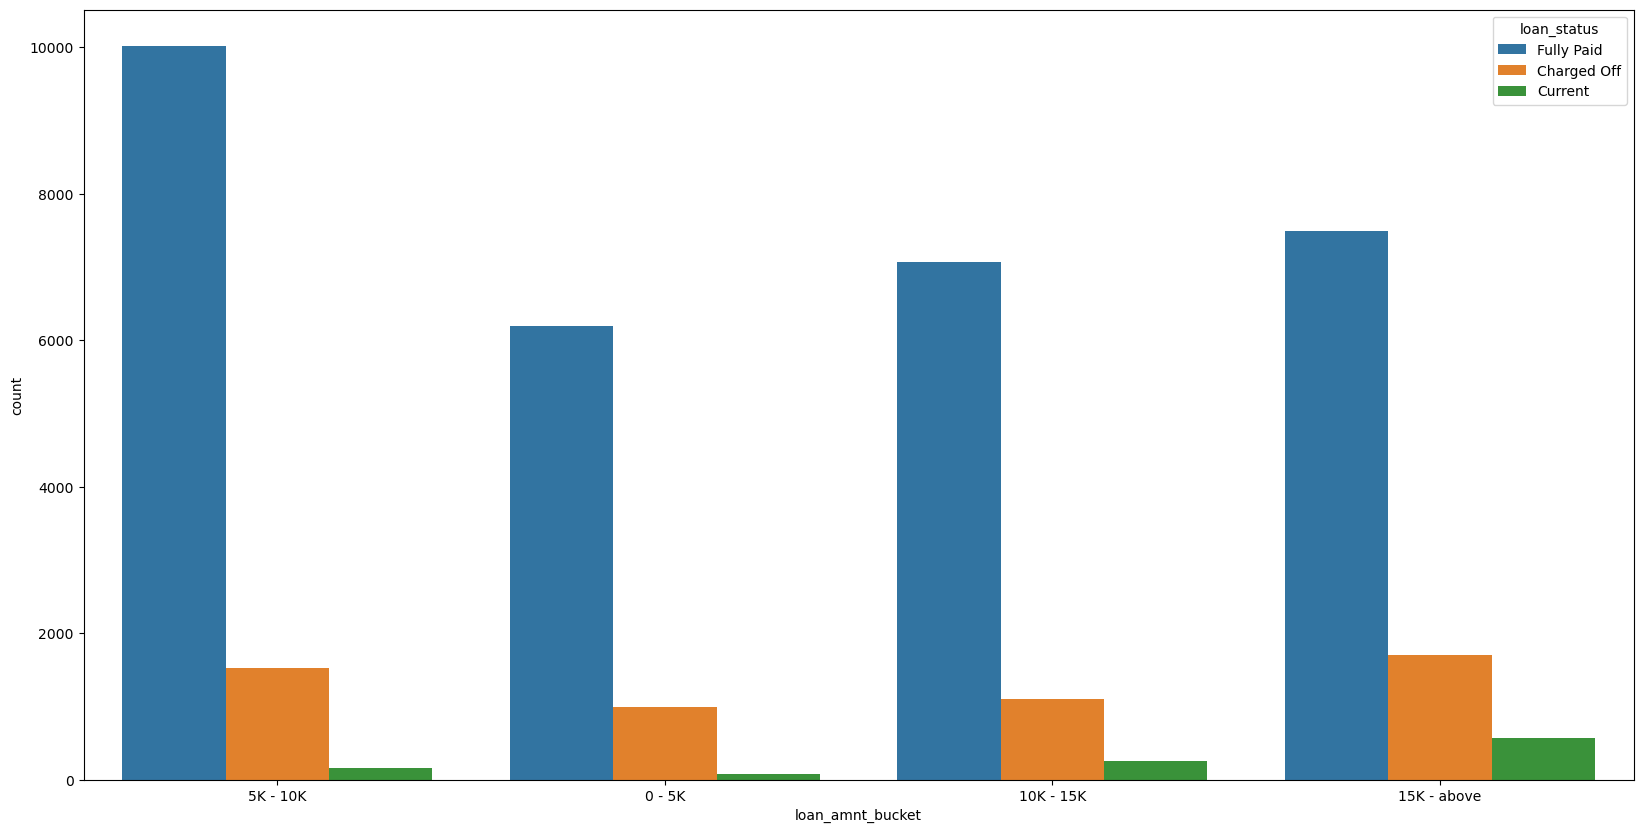

In [146]:
plt.figure(figsize=(20, 10))
sns.countplot(x='loan_amnt_bucket', hue ='loan_status', data=loan_data)
# California shows the highest percent of defaulters

### Conclusion : 

Mid size loans of 5 - 10k are the most in demand but the ratio of defaulters is more in the 15k and above list. 

The bank should assess the repayment capacity while handing out large loans

## 2.3.2 a Univariate analysis of Annual Income

count    37146.000000
mean     10876.098369
std       7179.166668
min        500.000000
25%       5125.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

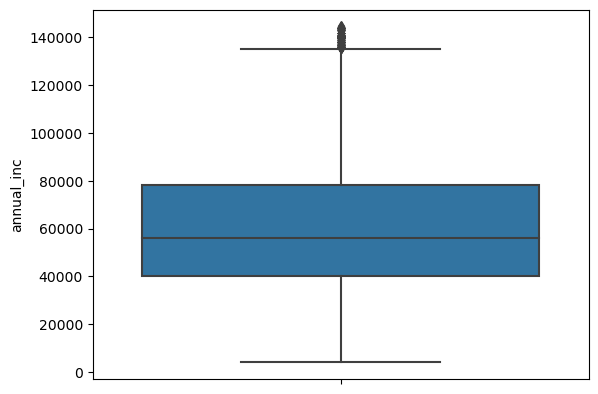

In [90]:
sns.boxplot(data=loan_data, y = 'annual_inc')
plt.title='Annual Income'
loan_data.loan_amnt.describe()

Text(0.5, 0, 'Annual Income')

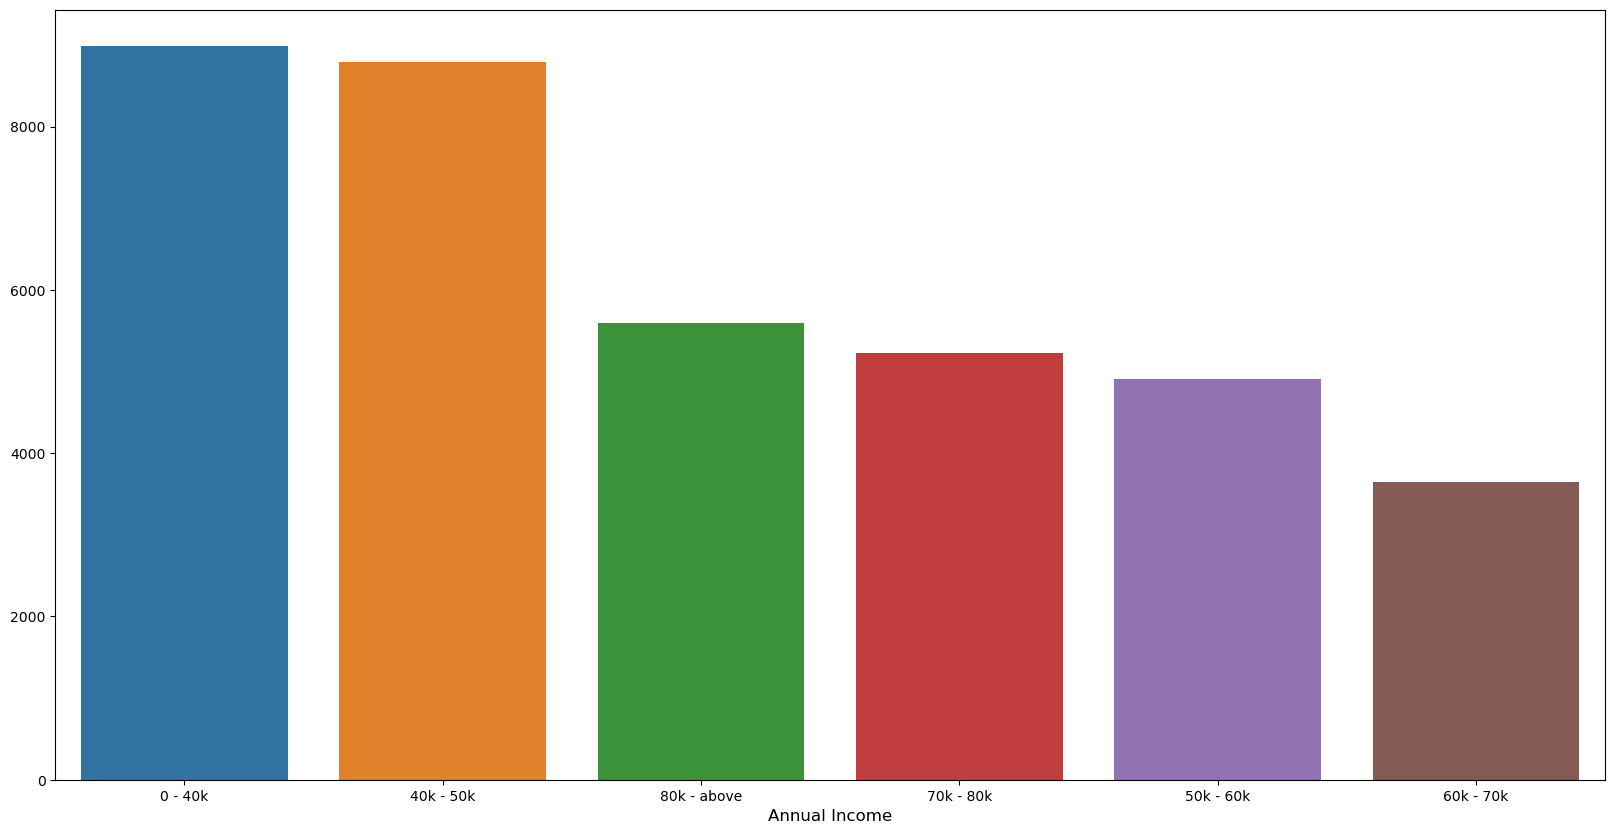

In [128]:
plt.figure(figsize=(20, 10))
sns.barplot(data=loan_data[loan_data['loan_status'] == 'Charged_off'], x =pd.Series(loan_data['annual_inc_bucket'].unique()), y= pd.Series(loan_data['annual_inc_bucket'].value_counts().values))
plt.xlabel('Annual Income', fontsize=12)
# People with the lower income bucket of 0 - 50k are more likely to default

### Conclusion:

People with the lower income bucket of 0 - 50k are more likely to default

## 2.3.2 b Bivariate analysis of Annual Income

<Axes: xlabel='annual_inc_bucket', ylabel='count'>

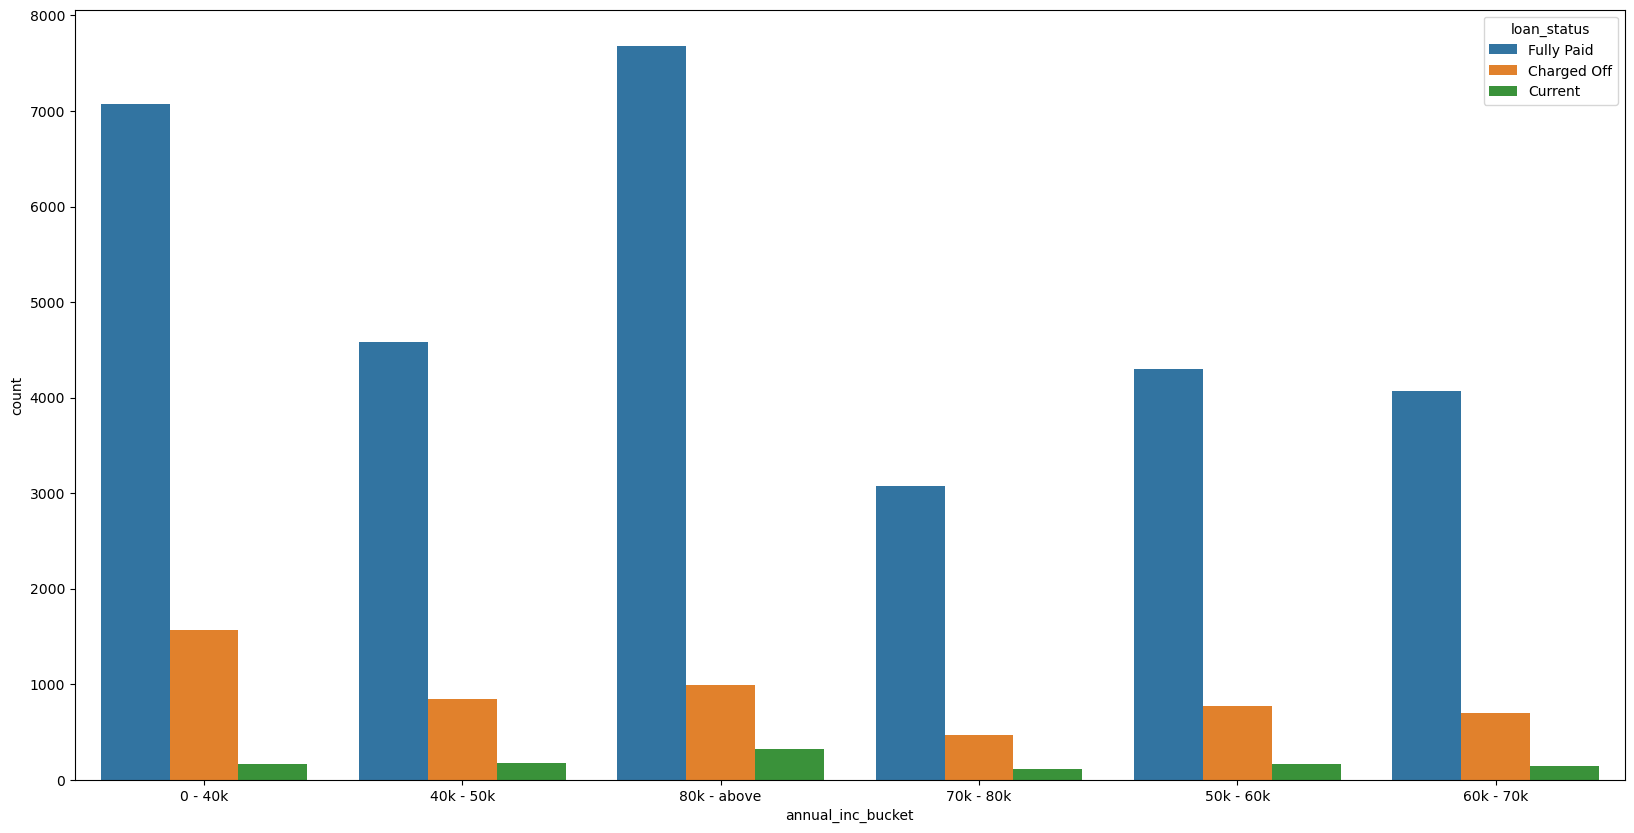

In [147]:
plt.figure(figsize=(20, 10))
sns.countplot(x='annual_inc_bucket', hue ='loan_status', data=loan_data)


## Conclusion:

People with the lower income bucket of 0 - 40k are more likely to default due to low cashflow and repayment capacity.

The bank should assess the income and be cautions with low income individuals

 ## 2.3.3 a Univariate analysis of Installment

count    37146.000000
mean       314.133868
std        199.692289
min         16.080000
25%        164.020000
50%        273.345000
75%        412.800000
max       1305.190000
Name: installment, dtype: float64

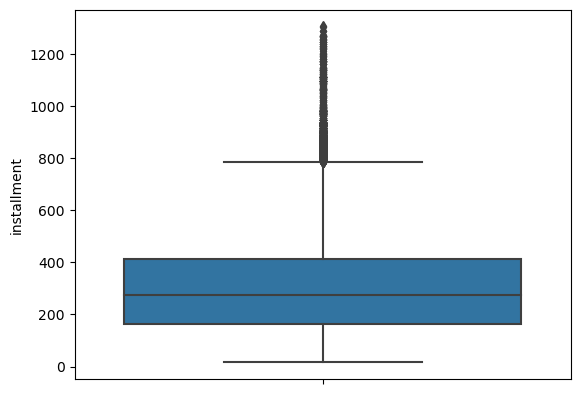

In [93]:
sns.boxplot(data=loan_data, y = 'installment')
plt.title='installment'
loan_data.installment.describe()

<Axes: xlabel='installment', ylabel='Count'>

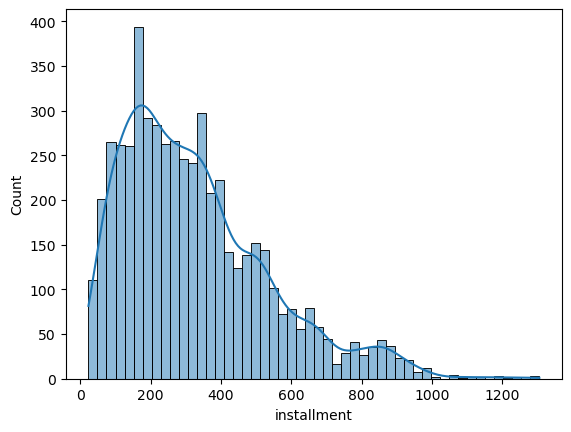

In [99]:
sns.histplot(data=loan_data[loan_data['loan_status'] == 'Charged Off'], x='installment', bins=50, kde=True) # Check the trend of the installments 

### COnclusion : 

Most of the installments are around $270. Installments of around 160 to 400 are more likely to default

## 2.3.4 a Univariate analysis of DTI

count    37146.000000
mean        13.529275
std          6.660654
min          0.000000
25%          8.430000
50%         13.670000
75%         18.800000
max         29.990000
Name: dti, dtype: float64

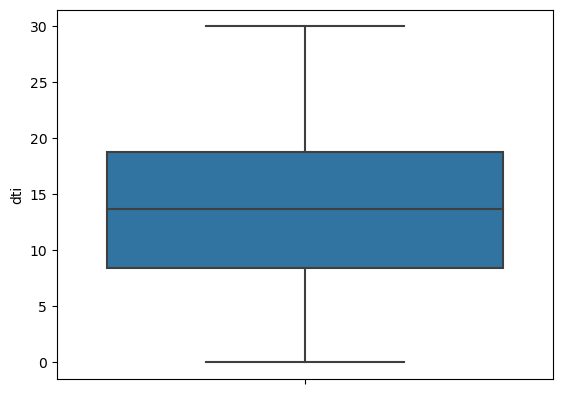

In [100]:
sns.boxplot(data=loan_data, y = 'dti')
plt.title='dti'
loan_data.dti.describe()

Text(0.5, 0, 'DTI')

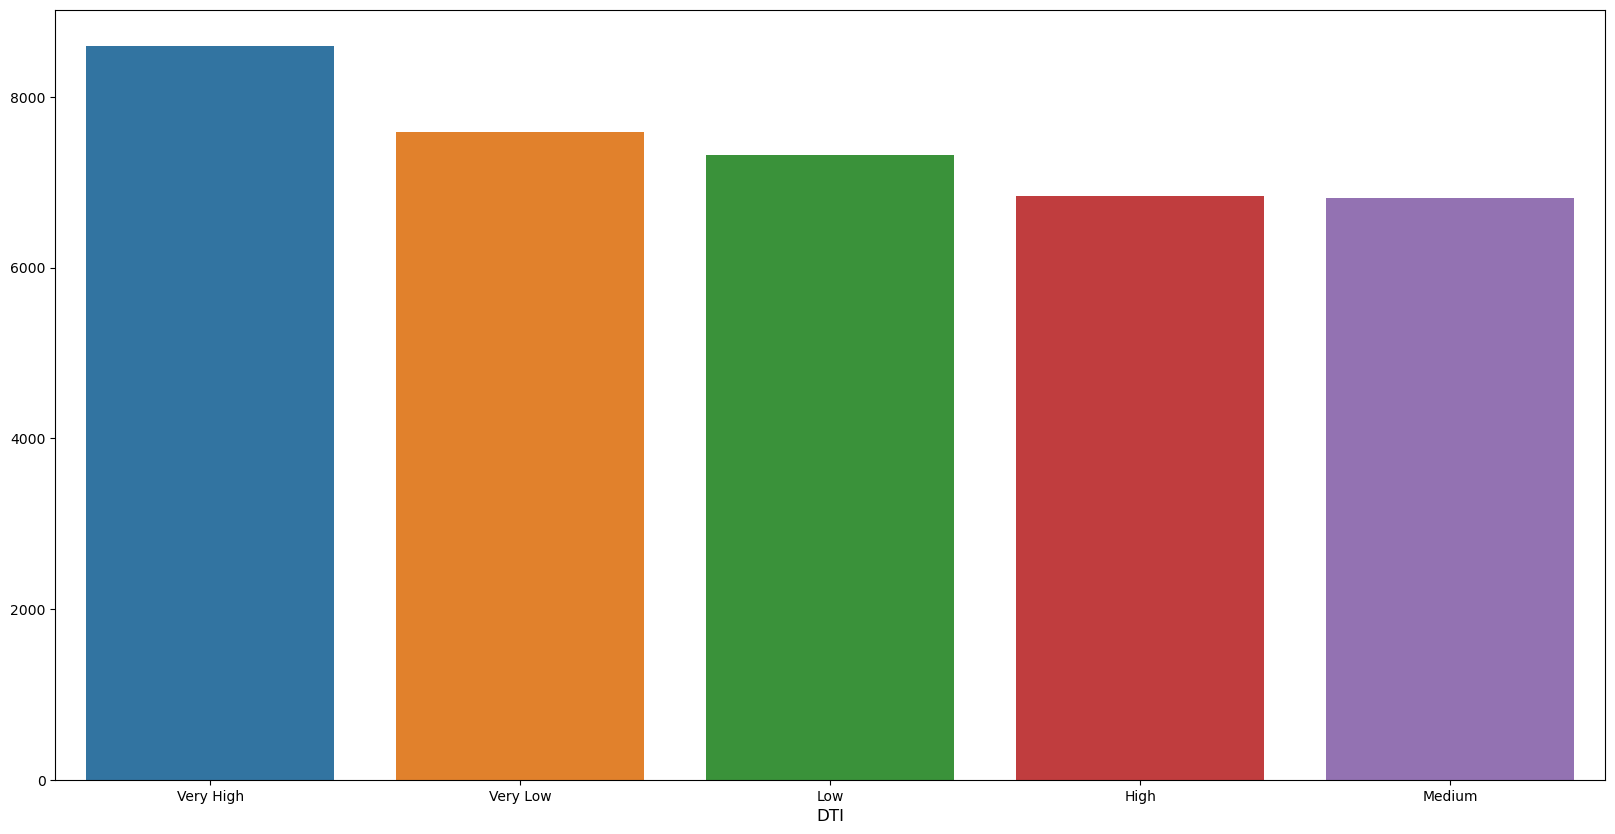

In [150]:
plt.figure(figsize=(20, 10))
sns.barplot(data=loan_data[loan_data['loan_status'] == 'Charged_off'], x =pd.Series(loan_data['dti_bucket'].unique()), y= pd.Series(loan_data['dti_bucket'].value_counts().values))
plt.xlabel('DTI', fontsize=12)

#High DTIs are more likely to default

### COnclusion : 

Highest and the lowest DTIs are more likely to default, but no strong correlation observed

## 2.3.4 b Bivariate analysis of DTI

<Axes: xlabel='dti_bucket', ylabel='count'>

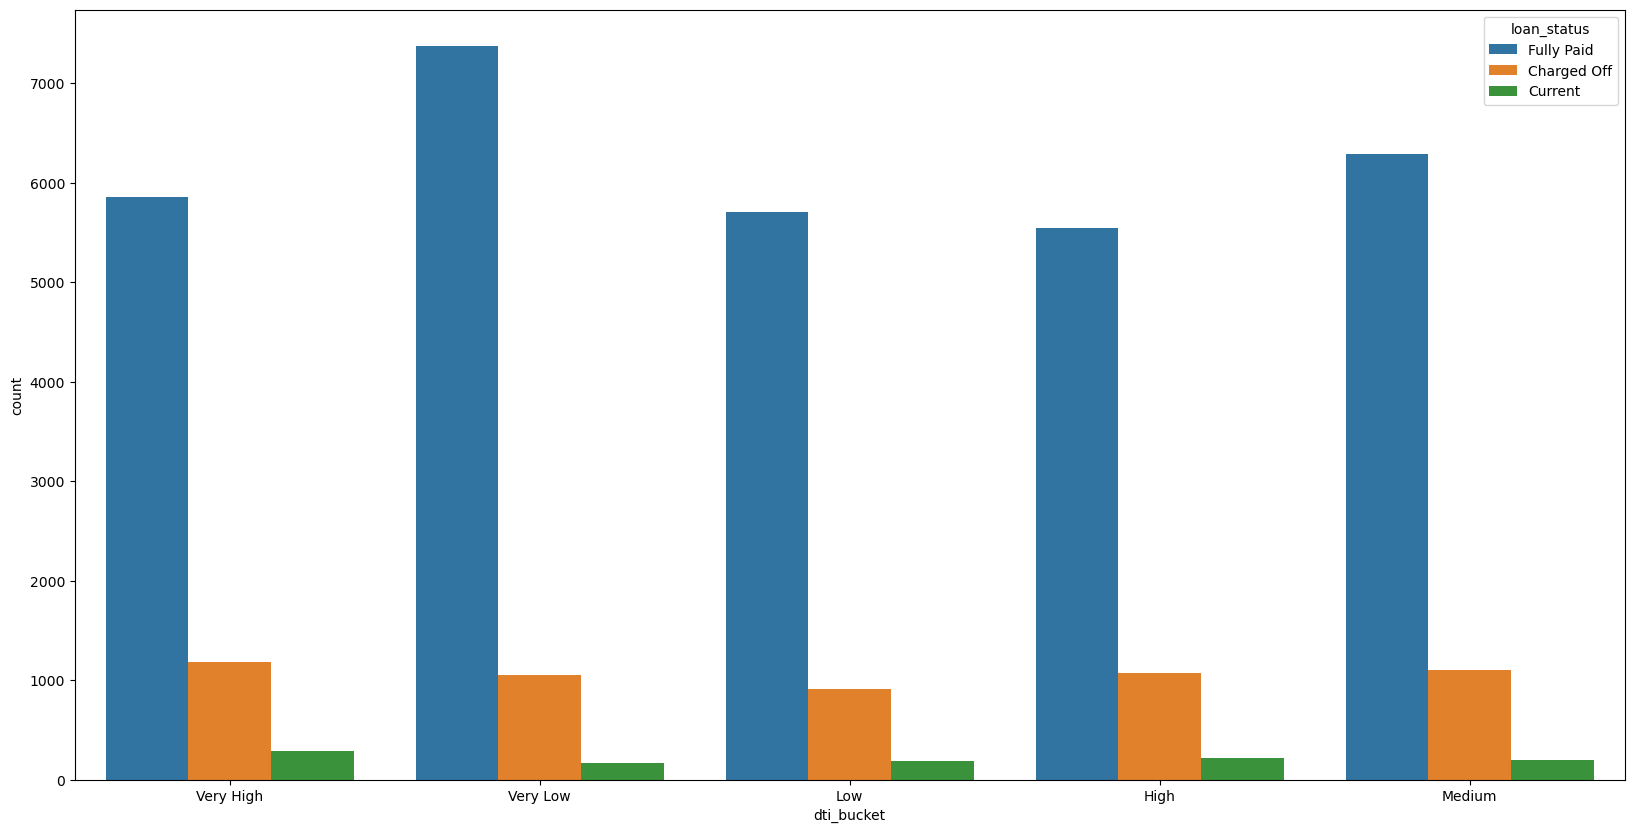

In [151]:
plt.figure(figsize=(20, 10))
sns.countplot(x='dti_bucket', hue ='loan_status', data=loan_data)

# California shows the highest percent of defaulters

### Conclusion:

Very low DTI is most common, but no strong correlation with charged off debts observed.

## 2.3.5 a Univariate analysis of Interest rate

count    37146.000000
mean        11.995589
std          3.717081
min          5.420000
25%          8.940000
50%         11.860000
75%         14.590000
max         24.400000
Name: int_rate, dtype: float64

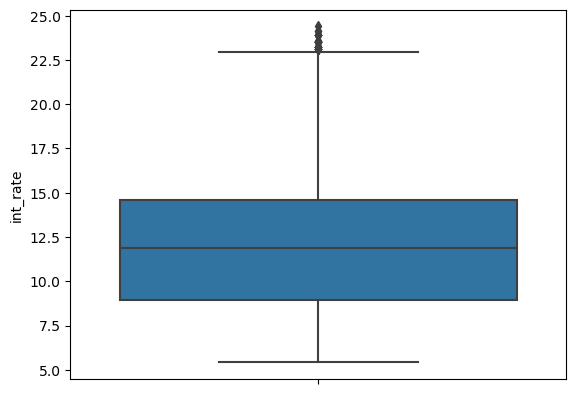

In [155]:
sns.boxplot(data=loan_data, y = 'int_rate')
plt.title='int_rate'
loan_data.int_rate.describe()

Text(0.5, 0, 'Interest Rate')

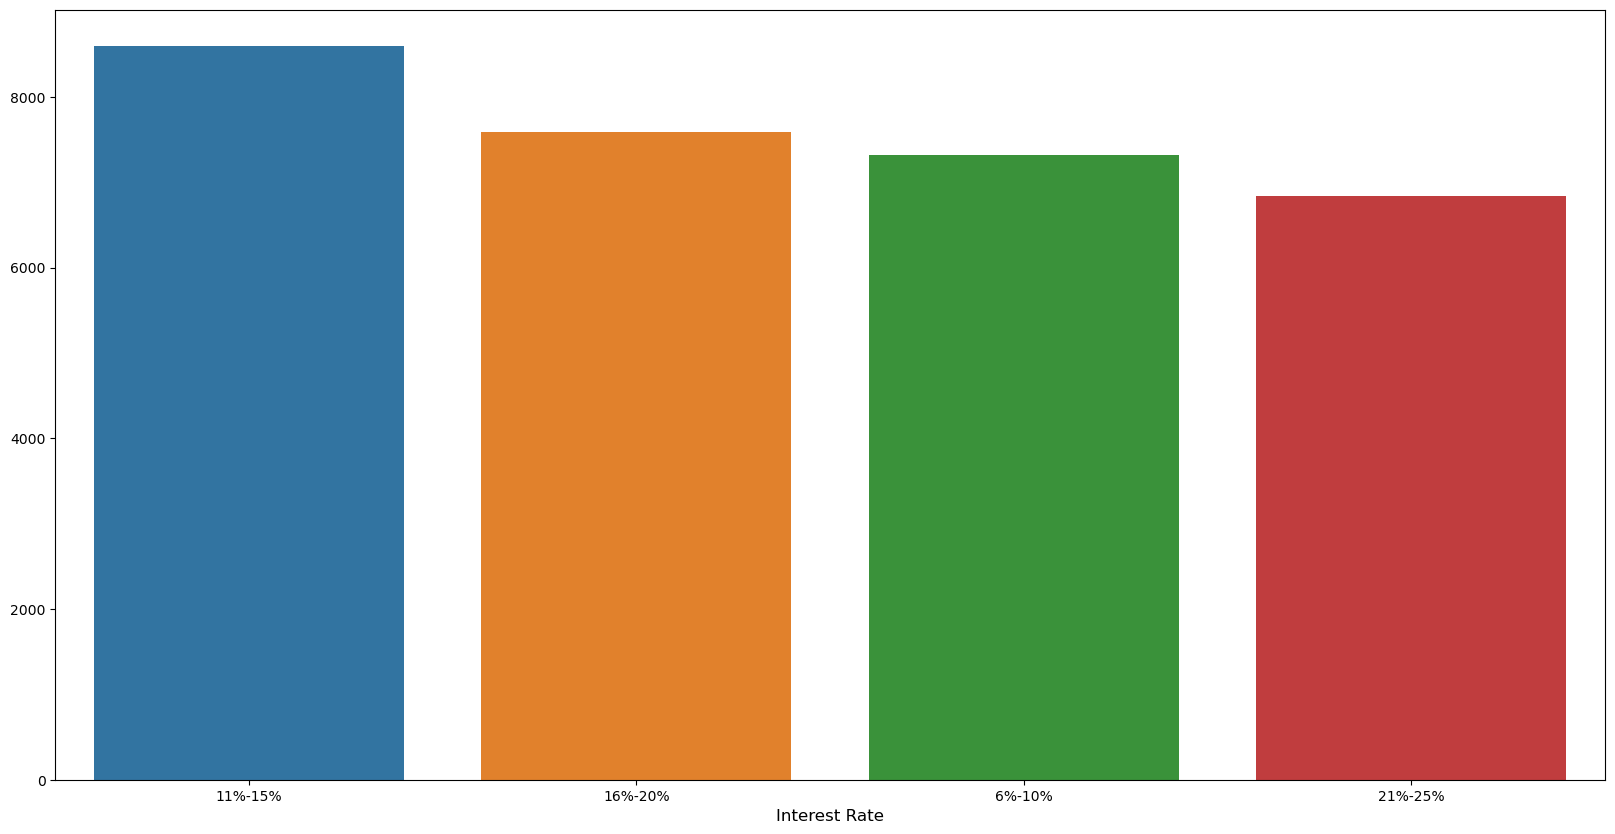

In [157]:
plt.figure(figsize=(20, 10))
sns.barplot(data=loan_data[loan_data['loan_status'] == 'Charged_off'], x =pd.Series(loan_data['int_rate_bucket'].unique()), y= pd.Series(loan_data['dti_bucket'].value_counts().values))
plt.xlabel('Interest Rate', fontsize=12)



### COnclusion : 

Higher defaults are seen in 11 - 15% interest rates

## 2.3.5 b Bivariate analysis of Interest Rate 

<Axes: xlabel='int_rate_bucket', ylabel='count'>

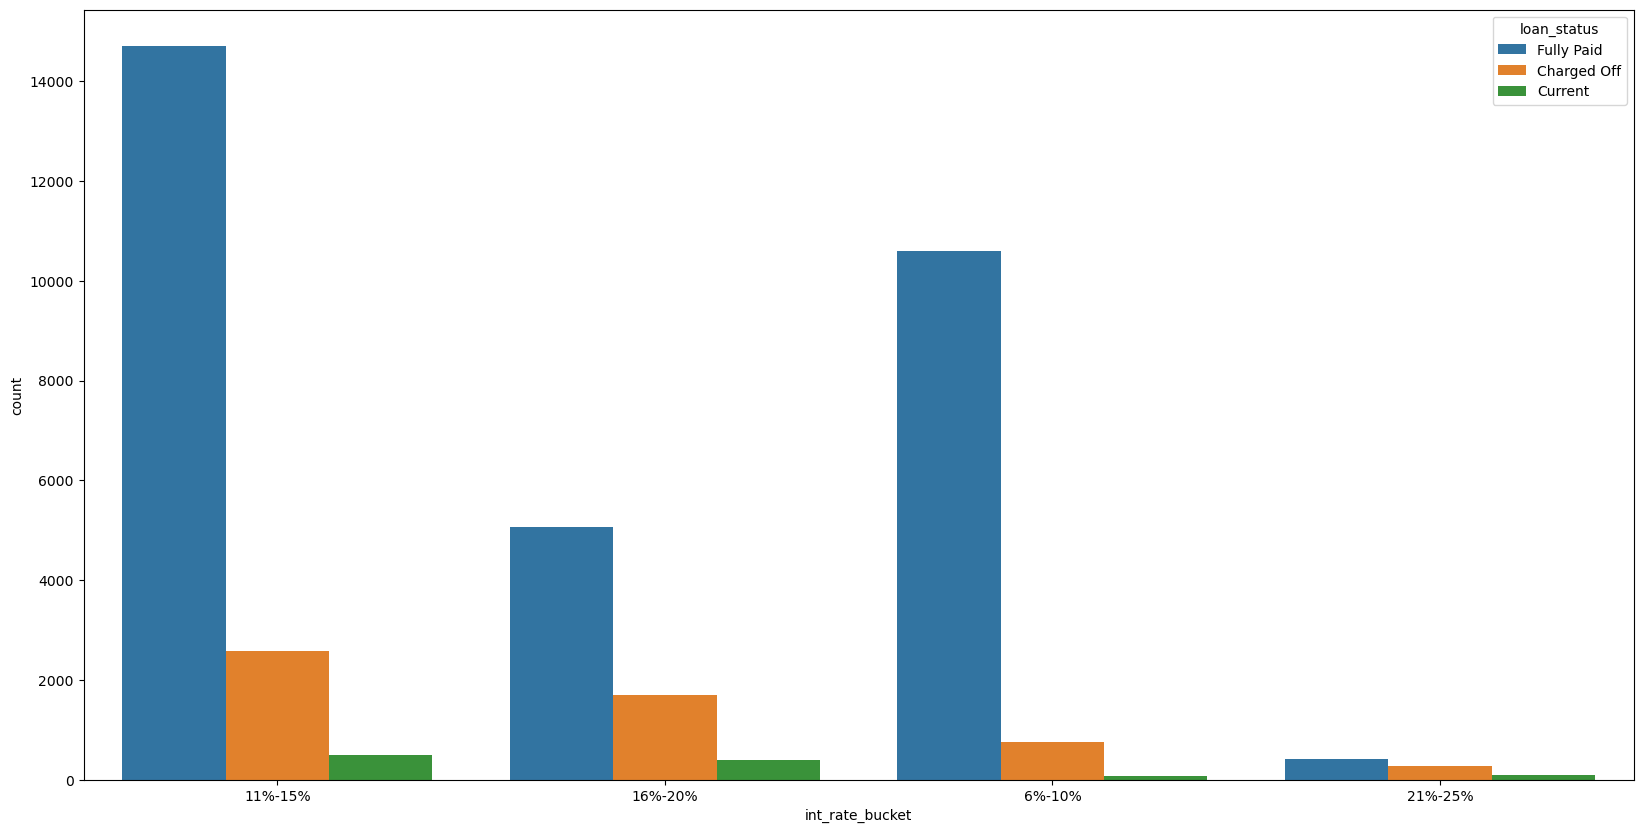

In [158]:
plt.figure(figsize=(20, 10))
sns.countplot(x='int_rate_bucket', hue ='loan_status', data=loan_data)

# California shows the highest percent of defaulters

### COnlsuion : 

The highest interest rate is uncommon but has the highest ration of defaults. The interest rate is optimal between 6 - 10%

## 2.3.6 a Univariate analysis of Funded amount

count    37146.000000
mean     10618.796775
std       6917.615550
min        500.000000
25%       5000.000000
50%       9250.000000
75%      14700.000000
max      35000.000000
Name: funded_amnt, dtype: float64

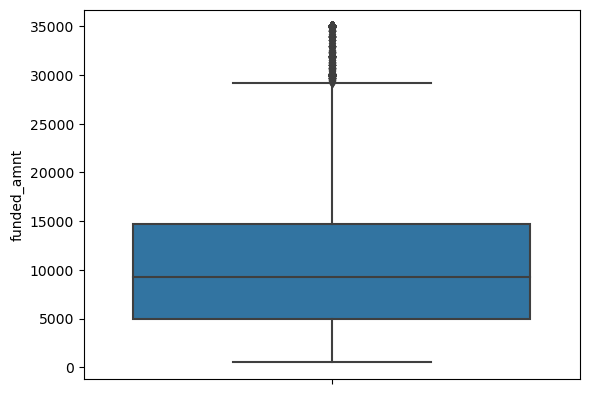

In [159]:
sns.boxplot(data=loan_data, y = 'funded_amnt')
plt.title='funded_amt'
loan_data.funded_amnt.describe()

Text(0.5, 0, 'Funded Amount')

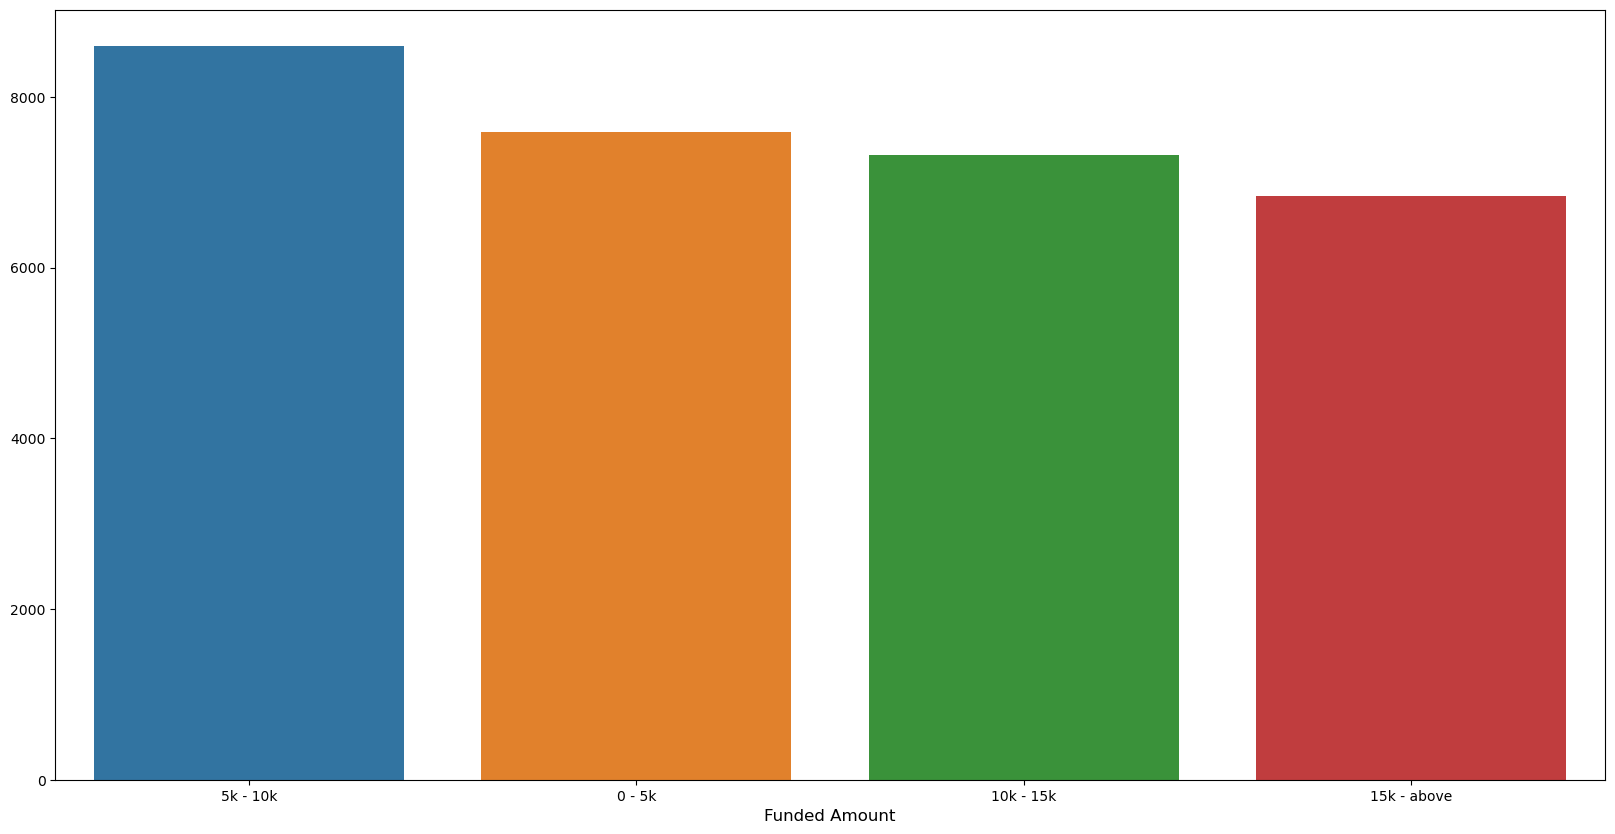

In [162]:
plt.figure(figsize=(20, 10))
sns.barplot(data=loan_data[loan_data['loan_status'] == 'Charged_off'], x =pd.Series(loan_data['funded_amnt_bucket'].unique()), y= pd.Series(loan_data['dti_bucket'].value_counts().values))
plt.xlabel('Funded Amount', fontsize=12)

#High DTIs are more likely to default

### COnlsuion : 

Lower funded amounts tend to be defaulted more



## 2.3.6 b Bivariate analysis of Funded amount

<Axes: xlabel='funded_amnt_bucket', ylabel='count'>

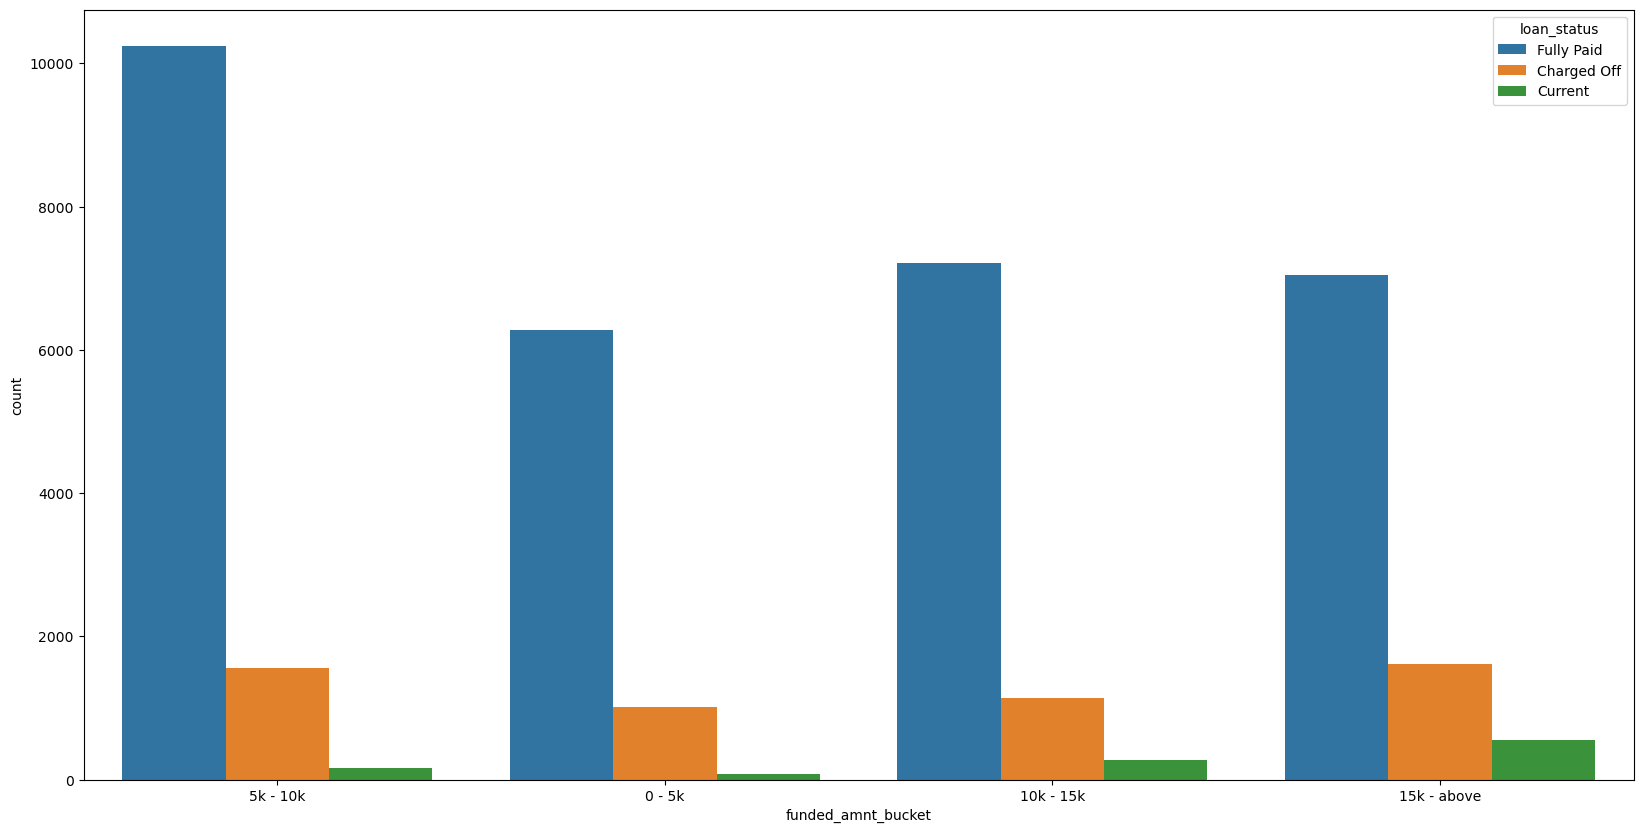

In [164]:
plt.figure(figsize=(20, 10))
sns.countplot(x='funded_amnt_bucket', hue ='loan_status', data=loan_data)

# California shows the highest percent of defaulters

### COnclusion : 

Higher funded amounts have a slighly higher ration of defaulting

## 2.4 Correlation analysis

In [165]:
loan_corr_data = loan_data.copy()
# Dropping columns which are irrelevant to analysis
loan_corr_data = loan_corr_data.drop(['issue_y', 'issue_m'], axis = 1)

C:\Users\Siddharth\AppData\Local\Temp\ipykernel_21024\2207928088.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = loan_corr_data.corr()


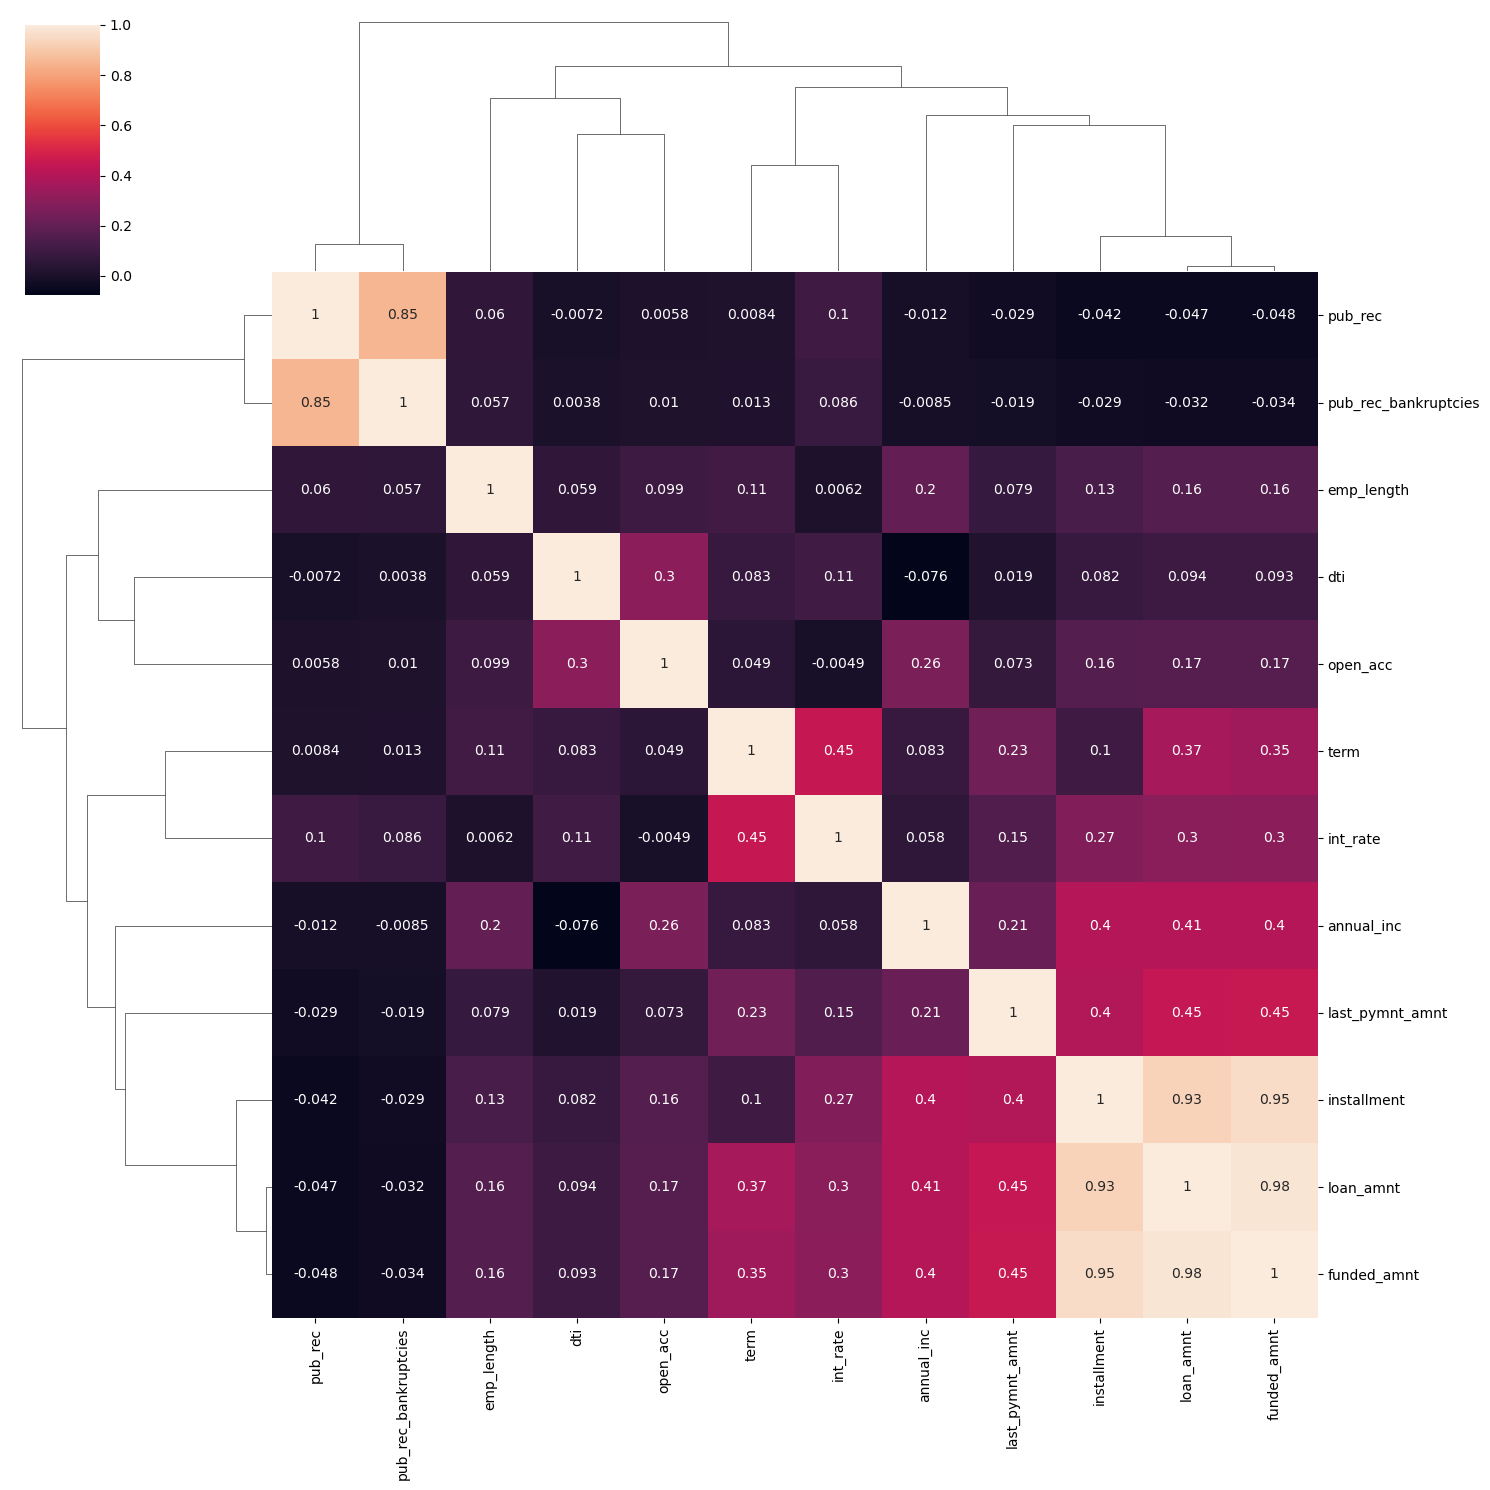

In [166]:
corr = loan_corr_data.corr()
#sns.set(font_scale=1.1)

sns.clustermap(corr, annot=True, figsize=(15, 15))
plt.show()


### Conlusion : 

DTI has the lowest correlation. also observed in bivariate analysis point 2.3.4 a and 2.3.4 b

Employment length and term have weak correlations too

Loan amt, funded amt and installment values have the highest correlation

Annual income has a negative correlation with dti

The lowest (Negative) correlation is observed between loan amount and derogatory public records

## Final Conclusion : 

Ordered Categorical Variables

	Grade : 
		Univariate result : Grade B gets charged off the most     
		Bivariate result : Loan Grade B is defaulted the most followed by C

	Subgrade : 
		Univariate result : Subgrade B2 is charged off the most followed by C4, C5 and C1    
		Bivariate result : Grade B5 is charged off the most followed by C1, B3 and B4

	Term :
		Univariate result : 36 month loans get defaulted the most   
		Bivariate result : The ratio of 60 month loans getting defaulted are higher

	Employment Length : 
		Univariate result : Employees with 10 years and more experience tend to default the most        
		Bivariate result : Employees having experience of 10 years tend to take the most loans and default more than the others

	Year : 
		Univariate result : 2011 may have economic factors due to which the charged off loans are more      
		Bivariate result : The number of loan applicants increased in 2011 indicating increased economic activity
		
	Quarter : 
		Univariate result : Q4 takes the highest number of loans mostly due to december holiday season
        Bivariate result : Q4 takes the highest number of loans mostly due to december holiday season


Unordered Categorical Variables

	State : 
		Univariate result : Arizona contributes the most defaulters    
		Bivariate result : California shows the highest percent of defaulters floowed by Florida and New York

	Home Ownnership : 
		Univariate result : Rental owners default the most
		Bivariate result : Rental and mortgage owners tend to default more on loans due to other payments like other mortgages and rent.

	Purpose : 
		Univariate result : Credit card loans has the highest number of defaulters with 17500 defaulters
		Bivariate result : Debt consolidation loans are the most defaulted, as the user takes loans to pay off previous loans causing cash flow issues.
							Recomendation is to stringently assess loans for debt consolidation


Quantitative Variables 

	Loan Amount : 
		Univariate result : Mid size loans of 5 - 10k are the most defaulted
		Bivariate result : Mid size loans of 5 - 10k are the most in demand but the ratio of defaulters is more in the 15k and above list.
							Recomendation is to stringently assess loans for higher amounts
							
	Annual Income : 
		Univariate result : People with the lower income bucket of 0 - 50k are more likely to default   
		Bivariate result : People with the lower income bucket of 0 - 40k are more likely to default due to low cashflow and repayment capacity.

	Installments : 
		Most of the installments are around $270. Installments of around 160 to 400 are more likely to default.

	DTI :
		Univariate result : Highest and the lowest DTIs are more likely to default, but no strong correlation observed.
		Bivariate result : Very low DTI is most common, but no strong correlation with charged off debts observed.

	Interest Rate : 
		Univariate result : Higher defaults are seen in 11 - 15% interest rates
		Bivariate result : The highest interest rate is uncommon but has the highest ration of defaults. The interest rate is optimal between 6 - 10%

	Funded amount : 
		Univariate result : Lower funded amounts tend to be defaulted more
		Bivariate result : Higher funded amounts have a slighly higher ration of defaulting


Correlation analysis : 

	DTI has the lowest correlation. also observed in bivariate analysis point 2.3.4 a and 2.3.4 b
	Employment length and term have weak correlations too
	Loan amt, funded amt and installment values have the highest correlation
	Annual income has a negative correlation with dti
	The lowest (Negative) correlation is observed between loan amount and derogatory public records